In [361]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
from scipy.stats import zscore
from arabic_reshaper import reshape
from bidi.algorithm import get_display

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
Real_Estate = pd.read_csv('D:/Documents/Downloads/project3 tuwaiq/realEstate.csv')
Riyadh_Aqqar_Land = pd.read_excel('D:/Documents/Downloads/project3 tuwaiq/Riyadh_Aqqar.xlsx', sheet_name="Land (الاراضي)")
Riyadh_Aqqar_Villas = pd.read_excel('D:/Documents/Downloads/project3 tuwaiq/Riyadh_Aqqar.xlsx', sheet_name="Villas (الفلل)")
Riyadh_Aqqar_Apartments = pd.read_excel('D:/Documents/Downloads/project3 tuwaiq/Riyadh_Aqqar.xlsx', sheet_name="Apartments (الشقق)")
Riyadh_VillasAqar = pd.read_csv('D:/Documents/Downloads/project3 tuwaiq/RiyadhVillasAqar.csv')

C:\Users\attar\AppData\Local\Temp\ipykernel_29160\2952379742.py:5: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

# Real_Estate dataset

In [3]:
Real_Estate.head(2)

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,...,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,...,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.00,NaN,Thamer,True,17,False
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,"['004966630_1659781493595.jpg', '004966636_165...","['2022-08-06', '10:27:57']",3,1.0,2,...,NaN,NaN,exclusive_marketer,"['2022-08-06', '10:27:56']",4.33,yes,الاركان الثابته للعقارات,True,5,True


In [4]:
Real_Estate.shape

(6762, 30)

# Riyadh_Aqqar_Land dataset

In [5]:
Riyadh_Aqqar_Land.head(2)

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000


In [6]:
Riyadh_Aqqar_Land.shape

(2155, 8)

# Riyadh_Aqqar_Villas dataset

In [7]:
Riyadh_Aqqar_Villas.head(2)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322.0,1,1,1,1,1,1,0,0,1,1,3000000


In [8]:
Riyadh_Aqqar_Villas.shape

(1090, 20)

# Riyadh_Aqqar_Apartments dataset

In [9]:
Riyadh_Aqqar_Apartments.head(2)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000


In [10]:
Riyadh_Aqqar_Apartments.shape

(551, 15)

# Riyadh_VillasAqar dataset

In [11]:
Riyadh_VillasAqar.head(2)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3,5+,20.0,1,0,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


In [12]:
Riyadh_VillasAqar.shape

(46826, 26)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

# Real_Estate dataset

In [13]:
dtale.show(Real_Estate)

In [14]:
Real_Estate.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [15]:
Real_Estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [16]:
Real_Estate.describe(include='number')

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,onMarket
count,6.762000e+03,6.762000e+03,6762.000000,6762.000000,6760.000000,6762.000000,6.587000e+03,6552.000000,6057.000000,6745.000000,6743.000000,6717.000000,4662.000000,4662.000000,6363.000000,6762.000000
mean,1.325257e+06,4.475689e+06,43274.639899,2.569802,0.990680,2.066105,1.880134e+03,23.141331,2.862968,0.869978,0.722379,0.078160,17.850322,47.169254,4.344400,49.796066
std,8.326004e+05,1.934656e+05,28860.914338,1.117260,0.461318,0.928238,1.369202e+05,13.793542,4.657175,0.336353,0.447859,0.268443,35.434895,1627.623997,0.481803,71.213069
min,7.000000e+00,2.118990e+05,55.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,5.809750e+05,4.446396e+06,25000.000000,2.000000,1.000000,1.000000,9.800000e+01,15.000000,0.000000,1.000000,0.000000,0.000000,8.000000,9.000000,4.200000,19.000000
50%,1.203756e+06,4.528259e+06,35000.000000,3.000000,1.000000,2.000000,1.450000e+02,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,12.000000,4.380000,32.000000
75%,2.072661e+06,4.573634e+06,55000.000000,3.000000,1.000000,3.000000,1.800000e+02,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,18.000000,4.560000,61.000000
max,2.685054e+06,4.600241e+06,450000.000000,7.000000,5.000000,5.000000,1.111110e+07,100.000000,36.000000,1.000000,1.000000,1.000000,1000.000000,111111.000000,5.000000,2279.000000


In [17]:
Real_Estate.describe(include='object')

,title,content,imgs,refresh,last_update,location,path,district,advertiser_type,create_time,profileImg,UserName,iam_verified
count,6762,6668,6119,6762,6762,6762,6762,6762,6522,6762,4016,6669,6616
unique,3228,6119,6025,6355,6328,6726,6762,131,4,6755,1,1472,2
top,شقة للإيجار في حي الياسمين ، الرياض ، الرياض,شقه للايجار عوائل \r\n\r\nمؤثثه( مفروشه )\r\n\...,"['014992700_1658524206986.jpg', '014992707_165...","['2022-08-06', '12:27:16']","['2022-08-06', '12:27:16']","{'lat': 24.800714, 'lng': 46.597778, '__typena...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النرجس,exclusive_marketer,"['2022-08-02', '19:18:29']",yes,‏مؤسسة الحلم العربي,True
freq,127,12,3,20,20,4,1,810,2546,2,4016,251,6604


# Riyadh_Aqqar_Land dataset

In [203]:
Riyadh_Aqqar_Land["السعر الإجمالي"].median()

1442000.0

In [202]:
Riyadh_Aqqar_Land["السعر الإجمالي"].sort_values()

1446         1400
286          1400
1725        93600
1581       100000
519        106880
          ...    
1546    354375000
2086    434541800
2087    434541800
1547    850500000
1545    893025000
Name: السعر الإجمالي, Length: 2155, dtype: int64

In [192]:
dtale.show(Riyadh_Aqqar_Land)

In [19]:
Riyadh_Aqqar_Land.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

In [194]:
Riyadh_Aqqar_Land.shape

(2155, 8)

2025-02-19 23:02:55,419 - ERROR    - Exception occurred while processing request: `bins` must be positive, when an integer
Traceback (most recent call last):
  File "c:\Users\attar\AppData\Local\Programs\Python\Python38\lib\site-packages\dtale\views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
  File "c:\Users\attar\AppData\Local\Programs\Python\Python38\lib\site-packages\dtale\views.py", line 3183, in get_column_analysis
    return jsonify(**analysis.build())
  File "c:\Users\attar\AppData\Local\Programs\Python\Python38\lib\site-packages\dtale\column_analysis.py", line 141, in build
    return_data, code = self.analysis.build(self)
  File "c:\Users\attar\AppData\Local\Programs\Python\Python38\lib\site-packages\dtale\column_analysis.py", line 185, in build
    return_data, hist_labels = self.build_histogram_data(
  File "c:\Users\attar\AppData\Local\Programs\Python\Python38\lib\site-packages\dtale\column_analysis.py", line 161, in build_histogram_data
    hist_

In [20]:
Riyadh_Aqqar_Land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      2155 non-null   object 
 1   الغرض           2106 non-null   object 
 2   المدينة         2155 non-null   object 
 3   الحي            2155 non-null   object 
 4   الواجهة         2155 non-null   object 
 5   المساحة         2155 non-null   int64  
 6   سعر المتر       2155 non-null   float64
 7   السعر الإجمالي  2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [21]:
Riyadh_Aqqar_Land.describe(include="number")

,المساحة,سعر المتر,السعر الإجمالي
count,2155.000000,2155.000000,2.155000e+03
mean,1568.780510,4356.648574,5.050271e+06
std,9757.996967,35214.809640,3.141799e+07
min,1.000000,90.000000,1.400000e+03
25%,413.000000,1365.000000,7.810000e+05
50%,670.000000,2570.000000,1.442000e+06
75%,900.000000,4000.000000,3.150000e+06
max,299684.000000,945000.000000,8.930250e+08


In [22]:
Riyadh_Aqqar_Land.describe(include="object")

,نوع العقار,الغرض,المدينة,الحي,الواجهة
count,2155,2106,2155,2155,2155
unique,1,3,20,143,10
top,أرض,سكني,الرياض,الرياض,جنوبية
freq,2155,1440,1472,596,509


# Riyadh_Aqqar_Villas dataset

In [23]:
dtale.show(Riyadh_Aqqar_Villas)

In [24]:
Riyadh_Aqqar_Villas.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'المساحة', 'درج صالة', 'مطبخ',
       'غرفة خادمة', 'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة',
       'مصعد', 'السعر الاجمالي'],
      dtype='object')

In [25]:
Riyadh_Aqqar_Villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      1090 non-null   object 
 1   المدينة         1090 non-null   object 
 2   الحي            1090 non-null   object 
 3   الواجهة         1059 non-null   object 
 4   عدد الغرف       993 non-null    object 
 5   عدد الصالات     967 non-null    object 
 6   عدد الحمامات    993 non-null    object 
 7   عرض الشارع      465 non-null    float64
 8   المساحة         1059 non-null   float64
 9   درج صالة        1090 non-null   int64  
 10  مطبخ            1090 non-null   int64  
 11  غرفة خادمة      1090 non-null   int64  
 12  غرفة سائق       1090 non-null   int64  
 13  ملحق            1090 non-null   int64  
 14  حوش             1090 non-null   int64  
 15  مسبح            1090 non-null   int64  
 16  قبو             1090 non-null   int64  
 17  مدخل سيارة      1090 non-null   i

In [26]:
Riyadh_Aqqar_Villas.describe(include="number")

,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
count,465.00000,1059.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,17.24086,473.115203,0.700917,0.796330,0.697248,0.360550,0.544954,0.715596,0.082569,0.034862,0.781651,0.270642,2.629100e+06
std,4.75182,1399.036553,0.458066,0.402911,0.459660,0.480381,0.498204,0.451337,0.275356,0.183515,0.413315,0.444496,2.092205e+06
min,5.00000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+05
25%,15.00000,275.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000e+06
50%,18.00000,338.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.150000e+06
75%,20.00000,450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000e+06
max,40.00000,32020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+07


In [27]:
Riyadh_Aqqar_Villas.describe(include="object")

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات
count,1090,1090,1090,1059,993,967,993
unique,1,9,101,9,7,6,5
top,فيلا,الرياض,الرياض,شمالية,5,2,5+
freq,1090,936,123,258,397,433,796


# Riyadh_Aqqar_Apartments dataset

In [28]:
dtale.show(Riyadh_Aqqar_Apartments)

In [29]:
Riyadh_Aqqar_Apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')

In [30]:
Riyadh_Aqqar_Apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [31]:
Riyadh_Aqqar_Apartments.describe(include="number")

,عدد الغرف,عدد الصالات,المساحة,مطبخ,مدخل سيارة,مصعد,عمر العقار,مؤثثة,السعر الاجمالي
count,551.000000,541.000000,551.000000,551.000000,551.000000,551.000000,550.000000,551.000000,5.510000e+02
mean,3.029038,1.253235,151.633394,0.735027,0.346642,0.689655,1.385455,0.165154,1.137539e+06
std,0.755026,0.443694,41.423181,0.441720,0.476333,0.463055,2.955740,0.371657,3.315825e+05
min,1.000000,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+05
25%,3.000000,1.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+05
50%,3.000000,1.000000,142.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.100000e+06
75%,3.000000,1.000000,169.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.270000e+06
max,6.000000,3.000000,428.000000,1.000000,1.000000,1.000000,13.000000,1.000000,3.500000e+06


In [32]:
Riyadh_Aqqar_Apartments.describe(include="object")

,نوع العقار,المدينة,الحي,الواجهة,عدد الحمامات,الدور
count,551,551,551,389,551,477
unique,1,5,26,9,5,10
top,شقة,الرياض,حي النرجس,شمالية,3,أرضي
freq,551,477,134,96,396,178


# Riyadh_VillasAqar dataset

In [33]:
dtale.show(Riyadh_VillasAqar)

In [34]:
Riyadh_VillasAqar.columns

Index(['Unnamed: 0', 'front', 'rooms', 'lounges', 'bathrooms', 'streetWidth',
       'stairs', 'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen',
       'outdoorRoom', 'garage', 'duplex', 'space', 'apartments', 'maidRoom',
       'elevator', 'furnihsed', 'pool', 'basement', 'neighbourhood',
       'location', 'price', 'square price'],
      dtype='object')

In [35]:
Riyadh_VillasAqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [36]:
Riyadh_VillasAqar.describe(include="number")

,Unnamed: 0,rooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.000000,46826.000000,46636.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,4.682400e+04,46824.000000
mean,25915.132384,4.687439,18.158418,0.683979,2.454790,0.355871,0.466258,0.769380,0.979114,0.645112,0.907872,0.297698,380.021740,0.767821,0.235745,0.078738,0.116410,0.037671,2.347636e+06,6088.058800
std,14993.821359,1.104970,4.167866,0.464926,6.496833,0.478781,0.498866,0.421234,0.143004,0.478485,0.289210,0.457251,281.431272,0.422227,0.424468,0.269333,0.320719,0.190402,2.782053e+06,4515.845244
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000e+03,3.428571
25%,12925.250000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.180000e+06,3866.666667
50%,25836.500000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+06,5000.000000
75%,38917.750000,5.000000,20.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06,7600.000000
max,51844.000000,7.000000,100.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,136144.578300


In [37]:
Riyadh_VillasAqar.describe(include="object")

,front,lounges,bathrooms,apartments,neighbourhood,location
count,46826,45708,46826,46826,46826,46826
unique,10,6,5,36,295,5
top,شمالية,2,5+,0,طويق,غرب الرياض
freq,12160,19719,32371,18946,7775,13548


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# the dataset are found on keggle 
# 1- https://www.kaggle.com/datasets/abdulmalikm/apartments-in-riyadh
# 2- https://www.kaggle.com/datasets/myfaisal/riyadh-aqaar-dataset
# 3- https://www.kaggle.com/datasets/salmanshir/riyadhhousingdata

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# According to Kaggle's update information, the Real_Estate and Riyad_VillasAqqar datasets were updated two years ago, giving us an estimate of them being in the 2022-2023 span. Meanwhile, the other three datasets were updated one year ago, suggesting they fall within the 2023-2024 span.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
#The data had some consistency issues that were fixed during data cleaning

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


# Real_Estate dataset

In [40]:
Real_Estate.head(2)

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,...,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,...,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.00,NaN,Thamer,True,17,False
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,"['004966630_1659781493595.jpg', '004966636_165...","['2022-08-06', '10:27:57']",3,1.0,2,...,NaN,NaN,exclusive_marketer,"['2022-08-06', '10:27:56']",4.33,yes,الاركان الثابته للعقارات,True,5,True


In [41]:
Real_Estate.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [42]:
Real_Estate['advertiser_type'].value_counts()

advertiser_type
exclusive_marketer    2546
normal_marketer       1713
owner                 1656
agent                  607
Name: count, dtype: int64

In [43]:
pd.set_option('display.max_columns', None)
Real_Estate[Real_Estate['price'] == 55.000000]

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
6467,162390,4494032,شقة للإيجار في حي ، طريق الملك فيصل ، حي المرب...,55,مكيفات كونسيلت \r\nتشطيب راقي,NaN,"['2022-08-01', '23:19:45']",2,1.0,2,155.0,5.0,NaN,"['2022-08-01', '23:19:45']",0.0,1.0,0.0,"{'lat': 24.665655, 'lng': 46.701546, '__typena...",/شقق-للإيجار/الرياض/وسط-الرياض/حي-المربع/حي-طر...,حي المربع,1.0,155.0,exclusive_marketer,"['2022-07-03', '19:33:36']",4.34,NaN,ابو ابراهيم,True,50,False


# Riyadh_Aqqar_Land dataset

In [44]:
Riyadh_Aqqar_Land.head(2)

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000


In [45]:
Riyadh_Aqqar_Land['المدينة'].unique()

array([' امارة منطقة الرياض', ' الرياض ', ' حي قرطبة ', ' حي الرمال ',
       13843, ' الدرعية', ' حريملاء', ' العيينة ', ' حي عريض ', ' الرياض',
       ' حي السلي ', ' الجبيلة ', ' حي القيروان ', ' ', ' ضرما',
       ' حي المهدية ', ' رماح', ' حي ظهرة لبن ', ' حي العارض ', ' الخرج'],
      dtype=object)

In [46]:
Riyadh_Aqqar_Land[Riyadh_Aqqar_Land['المدينة'] == 13843]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
194,أرض,تجاري,13843,امارة منطقة الرياض,شمالية,750,600.0,450000
1058,أرض,سكني,13843,امارة منطقة الرياض,شمالية,750,600.0,450000
1059,أرض,سكني,13843,امارة منطقة الرياض,شمالية,750,600.0,450000
1060,أرض,سكني,13843,امارة منطقة الرياض,شمالية شرقية,2237,600.0,1342200
1061,أرض,سكني,13843,امارة منطقة الرياض,شمالية غربية,2250,600.0,1350000
1062,أرض,سكني,13843,امارة منطقة الرياض,شمالية غربية,2237,600.0,1342200
1063,أرض,سكني,13843,امارة منطقة الرياض,شمالية,2250,600.0,1350000
1064,أرض,سكني,13843,امارة منطقة الرياض,شمالية,1650,8000.0,13200000
1065,أرض,سكني,13843,امارة منطقة الرياض,غربية,2250,888.0,1998000
1066,أرض,سكني,13843,امارة منطقة الرياض,غربية,900,888.0,799200


# Riyadh_Aqqar_Villas dataset

In [47]:
Riyadh_Aqqar_Villas.head(2)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322.0,1,1,1,1,1,1,0,0,1,1,3000000


In [48]:
Riyadh_Aqqar_Villas['الواجهة'].unique()

array(['جنوبية', 'غربية', 'شمالية', 'شرقية', 'شمالية غربية',
       'شمالية شرقية', 'جنوبية شرقية', 'ثلاث شوارع', 'جنوبية غربية', nan],
      dtype=object)

In [49]:
Riyadh_Aqqar_Villas['الحي'].unique()

array([' حي العارض ', ' حي النرجس ', ' حي الملقا ', ' حي النخيل ',
       ' حي التعاون ', ' حي الوادي ', ' الرياض ', ' حي جامعة الملك سعود ',
       ' حي الربيع ', ' العيينة ', ' حي العقيق ', ' حي الياسمين ',
       ' حي العليا ', ' حي النزهة ', ' حي القيروان ', ' حي النفل ',
       ' حي الفلاح ', ' القرينه ', ' حي الرحمانية ', ' حي المصيف ',
       ' حي الندى ', ' حي الصحافة ', ' حي المحمدية ', ' حي المروج ',
       ' حي حطين ', ' حي الملك فهد ', ' حي الملقا7541 ',
       ' حي صلاح الدين ', ' شارع سعيد السلمي ', ' حي المونسية ',
       ' حي القدس ', ' حي الخليج ', ' حي الرمال ', ' حي النسيم الغربي ',
       ' حي الريان ', ' حي الروضة ', ' حي الحمراء ', ' حي النسيم الشرقي ',
       ' حي اشبيلية ', ' حي النهضة ', ' حي القادسية ', ' حي قرطبة ',
       ' حي اليرموك ', ' حي الملك فيصل ', ' حي الصفا ', ' حي النظيم ',
       ' شارع جبل مره ', ' حي البيان ', ' حي السعادة ', ' حي الاندلس ',
       ' ', ' حي الجنادرية ', ' حي الازدهار ', ' حي غرناطة ',
       ' حي المعيزلة ', ' حي الفيحاء ', ' 

# Riyadh_Aqqar_Apartments dataset

In [50]:
Riyadh_Aqqar_Apartments.head(2)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000


In [51]:
Riyadh_Aqqar_Apartments['الدور'].unique()

array([3, 'علوي', 'أرضي', 'ثالث', nan, 4, 'ثاني', 'دور 59', 'ارضي', '20+',
       'اول'], dtype=object)

In [52]:
Riyadh_Aqqar_Apartments['الحي'].unique()

array([' حي المروج ', ' حي العارض ', ' حي النرجس ', ' حي الياسمين ',
       ' حي العقيق ', ' حي القيروان ', ' حي الملقا ', ' حي النخيل ',
       ' الرياض ', ' حي الصحافة ', ' حي النفل ', ' حي حطين ',
       ' حي الربيع ', ' حي المصيف ', ' حي العليا ', ' حي الفلاح ',
       ' حي الندى ', ' حي الملك فهد ', ' حي الوادي ', ' حي التعاون ',
       ' حي المغرزات ', ' حي المرسلات ', ' حي النزهة ', ' ',
       ' شارع عبدالله بن العاص ', ' حي مطار الملك خالد الدولي '],
      dtype=object)

In [53]:
Riyadh_Aqqar_Apartments['الواجهة'].unique()

array(['جنوبية', 'شمالية غربية', nan, 'شمالية', 'شرقية', 'جنوبية شرقية',
       'ثلاث شوارع', 'غربية', 'جنوبية غربية', 'شمالية شرقية'],
      dtype=object)

In [54]:
Riyadh_Aqqar_Apartments['المدينة'].unique()

array([' الرياض ', ' منطقة الرياض', ' امارة منطقة الرياض', ' الرياض',
       ' حي العارض '], dtype=object)

In [55]:
Riyadh_Aqqar_Apartments['مؤثثة'].unique()

array([0, 1], dtype=int64)

In [56]:
Riyadh_Aqqar_Apartments['عمر العقار'].unique()

array([ 0.,  2., nan, 11.,  1.,  7.,  3., 10.,  9.,  5.,  4., 13.,  8.,
       12.,  6.])

In [57]:
Riyadh_Aqqar_Apartments['الدور'].unique()

array([3, 'علوي', 'أرضي', 'ثالث', nan, 4, 'ثاني', 'دور 59', 'ارضي', '20+',
       'اول'], dtype=object)

# Riyadh_VillasAqar dataset

In [58]:
Riyadh_VillasAqar.head(2)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,1,1,1,1,1,300,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3,5+,20.0,1,0,1,1,1,1,1,1,0,540,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556


In [59]:
Riyadh_VillasAqar.shape

(46826, 26)

In [60]:
Riyadh_VillasAqar['front'].unique()

array(['شرقية', 'غربية', 'جنوبية شرقية', 'شمالية', 'شمالية شرقية',
       'جنوبية', 'جنوبية غربية', 'شمالية غربية', 'ثلاث شوارع',
       'أربع شوارع'], dtype=object)

In [61]:
Riyadh_VillasAqar['location'].unique()

array(['جنوب الرياض', 'غرب الرياض', 'شرق الرياض', 'شمال الرياض',
       'وسط الرياض'], dtype=object)

In [62]:
Riyadh_VillasAqar['neighbourhood'].unique()

array([' عكاظ ', ' المهدية ', ' الشفا ', ' ظهرة لبن ', ' قرطبة ',
       ' السويدي ', ' الروضة ', ' القادسية ', ' بدر ',
       ' المدينة الصناعية الجديدة ', ' الجنادرية ', ' الفاخرية ',
       ' الشرق ', ' العارض ', ' الدار البيضاء ', ' الحمراء ', ' طويق ',
       ' احد ', ' النهضة ', ' الخليج ', ' اشبيلية ', ' الملك فيصل ',
       ' النسيم الغربي ', ' الرمال ', ' حطين ', ' الريان ', ' النرجس ',
       ' الحزم ', ' السلام ', ' طيبة ', 'ان مولى قريش ', ' الصحافة ',
       ' العزيزية ', ' الفلاح ', ' الملقا ', ' الرحمانية ', ' النرجس',
       ' الندوة ', ' نمار ', ' ديراب ', ' المعيزيلة ', ' ظهرة نمار ',
       ' مطار الملك خالد الدولي ', ' الغدير ', 'ه بن خليفه ',
       ' القيروان ', ' العوالي ', ' المونسية ', ' العريجاء الغربية ',
       'ى العصامي ', ' الياسمين ', ' أم الحمام الغربي ', 'ة نمار ',
       ' الربوة ', ' الملك فهد ', ' النخيل ', ' اليمامة ', ' اليرموك ',
       ' الدريهمية ', ' ظهرة البديعة ', 'ى الفرضي ', 'ى بن مسعود ',
       ' عريض ', ' النفل ', ' الاندلس ', ' المعذر

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


# Real_Estate dataset

In [63]:
Real_Estate[Real_Estate.duplicated()]  # To find any duplicate rows

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent


# Riyadh_Aqqar_Land dataset

In [64]:
Riyadh_Aqqar_Land[Riyadh_Aqqar_Land.duplicated()]  # To find any duplicate rows

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
13,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
19,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3200.0,3484800
34,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية,300,1950.0,585000
44,أرض,سكني,الرياض,حي الخليج,شمالية,300,2600.0,780000
50,أرض,سكني,الرياض,حي الحمراء,جنوبية,1000,6000.0,6000000
...,...,...,...,...,...,...,...,...
2063,أرض,سكني,الرياض,الرياض,شرقية,2450,2400.0,5880000
2096,أرض,سكني,الرياض,حي الروضة,جنوبية,627,4200.0,2633400
2116,أرض,سكني,الرياض,حي العارض,ثلاث شوارع,5450,4600.0,25070000
2125,أرض,تجاري,الرياض,حي المهدية,جنوبية,900,7600.0,6840000


In [65]:
Riyadh_Aqqar_Land[Riyadh_Aqqar_Land['السعر الإجمالي'].duplicated()]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000
5,أرض,تجاري وسكني,الرياض,حي الرمال,جنوبية,2400,3300.0,7920000
12,أرض,تجاري وسكني,الرياض,حي الرمال,شرقية,450,3500.0,1575000
13,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
14,أرض,تجاري وسكني,امارة منطقة الرياض,الرياض,جنوبية,1089,3300.0,3593700
...,...,...,...,...,...,...,...,...
2143,أرض,سكني,حريملاء,ملهم,جنوبية شرقية,10000,1000.0,10000000
2144,أرض,سكني,الرياض,حي الحمراء,شمالية,1125,5000.0,5625000
2146,أرض,تجاري وسكني,الرياض,حي النظيم,جنوبية شرقية,2500,2000.0,5000000
2148,أرض,تجاري وسكني,الرياض,حي الدفاع,جنوبية,457,2100.0,959700


# Riyadh_Aqqar_Villas dataset

In [66]:
Riyadh_Aqqar_Villas[Riyadh_Aqqar_Villas.duplicated(keep=False)]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
249,فيلا,امارة منطقة الرياض,الرياض,شرقية,4,1,3,NaN,180.0,0,1,0,0,0,0,0,0,1,0,1100000
252,فيلا,الرياض,حي المونسية,غربية,4,2,5+,NaN,300.0,1,1,1,0,1,1,0,0,1,1,2200000
254,فيلا,الرياض,حي القدس,شمالية,5,5,5+,NaN,900.0,1,1,0,0,1,1,1,0,1,0,4700000
255,فيلا,الرياض,حي الخليج,غربية,5,2,4,NaN,324.0,1,1,1,1,1,1,0,0,1,0,2200000
256,فيلا,الرياض,حي الرمال,شمالية,7+,1,5+,NaN,281.0,0,0,0,0,0,0,0,0,0,0,1400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,فيلا,الرياض,حي المونسية,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,2300000
1061,فيلا,الرياض,حي المونسية,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,2300000
1062,فيلا,امارة منطقة الرياض,الرياض,شرقية,5,3,5+,NaN,375.0,1,1,1,0,1,1,0,0,1,1,3650000
1078,فيلا,امارة منطقة الرياض,الرياض,غربية,5,1,5+,18.0,250.0,1,1,1,0,0,0,0,0,0,0,1450000


In [67]:
Riyadh_Aqqar_Villas[Riyadh_Aqqar_Villas['السعر الاجمالي'].duplicated(keep=False)]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322.0,1,1,1,1,1,1,0,0,1,1,3000000
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350.0,1,0,1,0,1,0,0,1,1,1,2600000
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350.0,1,1,1,0,0,1,0,1,1,1,2600000
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270.0,1,1,1,1,0,0,0,0,1,0,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,فيلا,الرياض,حي الازدهار,جنوبية شرقية,7+,5,5+,NaN,720.0,1,1,1,1,1,1,0,1,1,0,3900000
1086,فيلا,امارة منطقة الرياض,الرياض,جنوبية,NaN,NaN,NaN,NaN,320.0,0,0,0,0,0,0,0,0,0,0,1550000
1087,فيلا,الرياض,حي النسيم الغربي,شرقية,4,1,3,NaN,450.0,0,0,0,0,0,1,0,0,1,0,1500000
1088,فيلا,الرياض,حي الاندلس,شرقية,5,1,5+,NaN,632.0,0,1,1,0,1,1,0,0,1,0,2400000


# Riyadh_Aqqar_Apartments dataset

In [68]:
Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments.duplicated(keep=False)]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
4,شقة,الرياض,حي الياسمين,شرقية,4,1.0,3,147,1,0,1,علوي,2.0,1,1200000
7,شقة,الرياض,حي النرجس,شرقية,2,1.0,3,100,1,0,1,3,0.0,0,1200000
9,شقة,الرياض,حي العقيق,NaN,3,1.0,3,115,0,1,1,NaN,11.0,0,1100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,شقة,الرياض,حي العارض,جنوبية,3,2.0,3,147,1,1,1,NaN,0.0,0,959000
525,شقة,الرياض,حي النرجس,شرقية,3,1.0,4,178,1,0,1,أرضي,0.0,0,900000
527,شقة,منطقة الرياض,الرياض,شمالية,3,1.0,2,104,0,1,1,3,1.0,0,715000
528,شقة,الرياض,حي الربيع,جنوبية,3,1.0,3,114,1,0,1,أرضي,0.0,0,1000000


In [69]:
Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments['السعر الاجمالي'].duplicated(keep=False)]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000
3,شقة,الرياض,حي النرجس,شمالية,3,1.0,3,101,1,0,0,أرضي,0.0,1,1200000
4,شقة,الرياض,حي الياسمين,شرقية,4,1.0,3,147,1,0,1,علوي,2.0,1,1200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,شقة,الرياض,حي الملقا,شمالية,3,1.0,2,139,1,0,1,علوي,8.0,1,850000
545,شقة,الرياض,حي النرجس,غربية,2,1.0,3,100,1,0,1,3,0.0,1,1150000
546,شقة,الرياض,حي الصحافة,NaN,3,1.0,3,201,1,0,1,علوي,9.0,0,1100000
547,شقة,الرياض,حي المروج,NaN,3,1.0,3,127,1,0,1,3,0.0,1,1600000


In [70]:
Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments['السعر الاجمالي']== 700000]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
193,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
260,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
374,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
488,شقة,الرياض,حي العقيق,NaN,3,2.0,3,123,1,0,1,أرضي,11.0,0,700000


# Riyadh_VillasAqar dataset

In [71]:
Riyadh_VillasAqar[Riyadh_VillasAqar.duplicated(keep=False)]

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price


In [72]:
Riyadh_VillasAqar.shape

(46826, 26)

In [73]:
Riyadh_VillasAqar[Riyadh_VillasAqar['price'].duplicated()]

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
11,11,جنوبية,5,4,5+,21.0,1,0,0,1,1,1,1,1,1,300,0,0,0,0,0,0,بدر,جنوب الرياض,1050000.0,3500.000000
15,16,شمالية,5,2,5+,15.0,1,0,0,0,1,1,1,1,0,300,0,1,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
16,17,شرقية,5,5,5+,20.0,1,0,0,0,1,1,1,1,1,300,0,1,0,0,0,0,عكاظ,جنوب الرياض,1100000.0,3666.666667
18,19,شمالية,5,2,4,15.0,0,23,1,0,0,1,0,1,0,552,2,1,0,0,0,0,الفاخرية,غرب الرياض,1200000.0,2173.913043
19,20,شرقية,7,2,5+,20.0,1,0,1,1,1,1,1,1,0,375,2,1,1,0,1,0,الشرق,شرق الرياض,2000000.0,5333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,51840,جنوبية,5,2,5+,20.0,1,0,0,1,1,1,1,1,0,385,1,1,1,0,0,0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,51841,غربية,7,2,5+,12.0,1,0,0,1,1,1,1,1,0,500,0,1,0,0,0,0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,51842,غربية,5,3,5+,20.0,0,0,0,1,1,1,1,1,1,200,0,1,0,0,0,0,طويق,غرب الرياض,1000000.0,5000.000000
46824,51843,جنوبية غربية,1,NaN,1,15.0,0,0,0,0,0,1,0,0,0,405,2,0,0,0,0,0,النهضة,شرق الرياض,2300000.0,5679.012346


In [74]:
Riyadh_VillasAqar[Riyadh_VillasAqar['price'] == 1080 ]

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
3848,4248,غربية,1,2,5+,20.0,0,0,0,0,0,1,0,0,0,315,0,0,0,0,0,0,عكاظ,جنوب الرياض,1080.0,3.428571
13490,14873,غربية,1,2,5+,20.0,0,0,0,0,0,1,0,0,0,315,0,0,0,0,0,0,عكاظ,جنوب الرياض,1080.0,3.428571
42889,47517,غربية,1,2,5+,20.0,0,0,0,0,0,1,0,0,0,315,0,0,0,0,0,0,عكاظ,جنوب الرياض,1080.0,3.428571


In [75]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [76]:
Real_Estate.isnull().sum().sort_values(ascending = False)

profileImg         2746
width              2100
length             2100
age                 705
imgs                643
review              399
advertiser_type     240
street_width        210
area                175
iam_verified        146
content              94
UserName             93
furnished            45
ac                   19
ketchen              17
livings               2
district              0
create_time           0
onMarket              0
user_id               0
path                  0
location              0
id                    0
last_update           0
wc                    0
beds                  0
refresh               0
price                 0
title                 0
IsRent                0
dtype: int64

In [77]:
Riyadh_Aqqar_Land.isnull().sum().sort_values(ascending = False)

الغرض             49
نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [78]:
Riyadh_Aqqar_Villas.isnull().sum().sort_values(ascending = False)

عرض الشارع        625
عدد الصالات       123
عدد الغرف          97
عدد الحمامات       97
الواجهة            31
المساحة            31
نوع العقار          0
ملحق                0
مصعد                0
مدخل سيارة          0
قبو                 0
مسبح                0
حوش                 0
مطبخ                0
غرفة سائق           0
غرفة خادمة          0
المدينة             0
درج صالة            0
الحي                0
السعر الاجمالي      0
dtype: int64

In [79]:
Riyadh_Aqqar_Apartments.isnull().sum().sort_values(ascending = False)

الواجهة           162
الدور              74
عدد الصالات        10
عمر العقار          1
نوع العقار          0
المدينة             0
الحي                0
عدد الغرف           0
عدد الحمامات        0
المساحة             0
مطبخ                0
مدخل سيارة          0
مصعد                0
مؤثثة               0
السعر الاجمالي      0
dtype: int64

In [80]:
Riyadh_VillasAqar.isnull().sum().sort_values(ascending = False)

lounges          1118
streetWidth       190
square price        2
price               2
duplex              0
location            0
neighbourhood       0
basement            0
pool                0
furnihsed           0
elevator            0
maidRoom            0
apartments          0
space               0
Unnamed: 0          0
front               0
outdoorRoom         0
kitchen             0
patio               0
tent                0
driverRoom          0
propertyAge         0
stairs              0
bathrooms           0
rooms               0
garage              0
dtype: int64

In [81]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [157]:
Real_Estate.dtypes

price                       int64
beds                        int64
livings                     int32
wc                          int64
area                      float64
street_width              float64
age                       float64
last_update        datetime64[ns]
kitchen                    object
ac                         object
furnished                  object
location                   object
district                   object
advertiser_type            object
create_time        datetime64[ns]
review                    float64
UserName                   object
iam_verified               object
onMarket                    int64
IsRent                       bool
latitude                  float64
longitude                 float64
dtype: object

In [83]:
Riyadh_Aqqar_Land.dtypes

نوع العقار         object
الغرض              object
المدينة            object
الحي               object
الواجهة            object
المساحة             int64
سعر المتر         float64
السعر الإجمالي      int64
dtype: object

In [84]:
Riyadh_Aqqar_Villas.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف          object
عدد الصالات        object
عدد الحمامات       object
عرض الشارع        float64
المساحة           float64
درج صالة            int64
مطبخ                int64
غرفة خادمة          int64
غرفة سائق           int64
ملحق                int64
حوش                 int64
مسبح                int64
قبو                 int64
مدخل سيارة          int64
مصعد                int64
السعر الاجمالي      int64
dtype: object

In [85]:
Riyadh_Aqqar_Apartments.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات       float64
عدد الحمامات       object
المساحة             int64
مطبخ                int64
مدخل سيارة          int64
مصعد                int64
الدور              object
عمر العقار        float64
مؤثثة               int64
السعر الاجمالي      int64
dtype: object

In [86]:
Riyadh_VillasAqar.dtypes

Unnamed: 0         int64
front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [87]:
# go to clean them 

In [88]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [89]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [90]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [91]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


# Real_Estate dataset Cleaning

In [92]:
# we droped these unrelvanets columns in Real_Estate dataset
Real_Estate.drop(['user_id', 'id', 'content', 'imgs', 'refresh', 'profileImg','path','title'],axis=1, inplace=True)

In [93]:
# we droped these unrelvanets columns in Real_Estate dataset
Real_Estate.drop(['width', 'length'],axis=1, inplace=True)

In [94]:
Real_Estate['advertiser_type']=Real_Estate['advertiser_type'].fillna('unknown')
Real_Estate['UserName']=Real_Estate['UserName'].fillna('unknown')

In [95]:
Real_Estate['area']=Real_Estate['area'].fillna(0)
Real_Estate['review']=Real_Estate['review'].fillna(0.0)

In [96]:
Real_Estate['age']=Real_Estate['age'].fillna(999)

In [97]:
median_value = Real_Estate['street_width'].median()
Real_Estate['street_width'] = Real_Estate['street_width'].fillna(median_value)

In [98]:
# we assume that if it is -1 then it is unknown how many living room 
Real_Estate['livings'] = Real_Estate['livings'].fillna(-1)
Real_Estate['livings'] = Real_Estate['livings'].astype(int)

In [99]:
# we change the values of ketchen,ac,iam_verified and furnished and fill the missing values
Real_Estate['ketchen'] = Real_Estate['ketchen'].replace({1: 'yes', 0: 'no'}).fillna('unknown')
Real_Estate['iam_verified'] = Real_Estate['iam_verified'].replace({True: 'yes', False: 'no'}).fillna('unknown')
Real_Estate['ac'] = Real_Estate['ac'].replace({1: 'yes', 0: 'no'}).fillna('unknown')
Real_Estate['furnished'] = Real_Estate['furnished'].replace({1: 'yes', 0: 'no'}).fillna('unknown')

In [100]:
#Using eval to read the location values as dictionaries and then stroing the lat and lng values in latitude and longitude
Real_Estate['latitude'] = Real_Estate['location'].apply(lambda x: eval(x)['lat'])
Real_Estate['longitude'] = Real_Estate['location'].apply(lambda x: eval(x)['lng'])

In [101]:
Real_Estate['last_update'] = pd.to_datetime(Real_Estate['last_update'].apply(lambda x: ' '.join(eval(x))))
Real_Estate['create_time'] = pd.to_datetime(Real_Estate['create_time'].apply(lambda x: ' '.join(eval(x))))

In [102]:
Real_Estate.rename(columns={'ketchen': 'kitchen'}, inplace=True)

# Riyadh_Aqqar_Land dataset Cleaning

In [103]:
Riyadh_Aqqar_Land['الغرض']=Riyadh_Aqqar_Land['الغرض'].fillna('غير معروف')

In [104]:
Riyadh_Aqqar_Land['الواجهة'] = Riyadh_Aqqar_Land['الواجهة'].replace(
    {'ثلاث شوارع': 'غير معروف', 'أربع شوارع': 'غير معروف'}
)

In [105]:
Riyadh_Aqqar_Land['الحي']=Riyadh_Aqqar_Land['الحي'].str.replace(' حي', '', regex=False)
Riyadh_Aqqar_Land['الحي'] = Riyadh_Aqqar_Land['الحي'].str.strip()

In [106]:
# List of cities that should not be changed to 'الرياض'
exclude_cities = ['الدرعية', 'حريملاء', 'العيينة', 'الجبيلة', 'الخرج', 'ضرما', 'رماح']

# Strip any leading/trailing whitespaces from the cities
Riyadh_Aqqar_Land['المدينة'] = Riyadh_Aqqar_Land['المدينة'].str.strip()

# Apply the change to the 'المدينة' column
Riyadh_Aqqar_Land['المدينة'] = Riyadh_Aqqar_Land['المدينة'].apply(
    lambda x: 'الرياض' if x not in exclude_cities else x
)


In [370]:
Riyadh_Aqqar_Land["الحي"].unique()

array(['الرياض', 'غرناطة', 'اليرموك', 'النسيم الغربي', 'الرمال',
       'الملك فيصل', 'المعيزلة', 'الشرق', 'المونسية', 'الروضة', 'المشرق',
       'الخليج', 'الشهداء', 'الحمراء', 'البيان', 'قرطبة', 'القادسية',
       'النهضة', 'الصناعية القديمة', 'العلا', 'الجنادرية', 'المعيزيلة',
       'السعادة', 'النسيم الشرقي', 'خشم العان', 'الصفا', 'اشبيلية',
       'طريق سعيد ابن زيد', 'القدس', 'الاندلس', 'الشعلة', 'الندوة',
       'الفيحاء', 'غير معروف', 'امارة منطقة الرياض', 'المنار', 'السلام',
       'الزاهر', 'الجزيرة', 'النظيم', 'الازدهار', 'الملز', 'العارض',
       'النرجس', 'العيينة', 'الملقا', 'الغنامية', 'عرقة', 'المهدية',
       'الدار البيضاء', 'سلطانة', 'الندى', 'ظهرة لبن', 'العين', 'حطين',
       'الهدا', 'طويق', 'المنصورة', 'عريض', 'المناخ', 'القيروان',
       'ضاحية نمار', 'الخير', 'الصحافة', 'العوالي', 'النخيل', 'ظهرة نمار',
       'طريق النفود', 'الحزم', 'عكاظ', 'بنبان', 'السويدي', 'البديعة',
       'الملك فهد', 'المحمدية', 'منفوحة الجديدة', 'الربيع', 'العقيق',
       'النفل', 'ال

In [369]:
# Create a dictionary with old names as keys and new names as values
name_replacements = {
    'شارع السلطان محمد الفاتح': 'طويق',
    'شارع سعيد بن عبدالله باقشير': 'المهدية',
    'شارع عبدالله بن العاص': 'العارض',
    'شارع العين': 'طويق',
    "شارع ابن ماجه" : "السلي"
}

# Replace the old names with the new ones in the 'الحي' column
Riyadh_Aqqar_Land['الحي'] = Riyadh_Aqqar_Land['الحي'].replace(name_replacements)

In [107]:
# Replace empty strings with 'غير معروف'
Riyadh_Aqqar_Land['الحي'] = Riyadh_Aqqar_Land['الحي'].replace('', 'غير معروف')


# Riyadh_Aqqar_Villas dataset Cleaning

In [108]:
median_value = Riyadh_Aqqar_Villas['عرض الشارع'].median()
Riyadh_Aqqar_Villas['عرض الشارع'] = Riyadh_Aqqar_Villas['عرض الشارع'].fillna(median_value)

In [109]:
Riyadh_Aqqar_Villas['عدد الصالات']=Riyadh_Aqqar_Villas['عدد الصالات'].fillna('غير معروف')

In [110]:
Riyadh_Aqqar_Villas['عدد الغرف']=Riyadh_Aqqar_Villas['عدد الغرف'].fillna('غير معروف')

In [111]:
Riyadh_Aqqar_Villas['عدد الحمامات']=Riyadh_Aqqar_Villas['عدد الحمامات'].fillna('غير معروف')

In [112]:
Riyadh_Aqqar_Villas['الواجهة'] = Riyadh_Aqqar_Villas['الواجهة'].replace(
    {'ثلاث شوارع': 'غير معروف', np.nan: 'غير معروف'}
)

In [113]:
Riyadh_Aqqar_Villas['المساحة']=Riyadh_Aqqar_Villas['المساحة'].fillna(0.0)

In [114]:
import pandas as pd
Riyadh_Aqqar_Villas['الحي']=Riyadh_Aqqar_Villas['الحي'].str.replace(' حي', '', regex=False)
Riyadh_Aqqar_Villas['الحي'] = Riyadh_Aqqar_Villas['الحي'].str.strip()

# Remove numbers from the 'الحي' column
Riyadh_Aqqar_Villas['الحي'] = Riyadh_Aqqar_Villas['الحي'].str.replace(r'\d+', '', regex=True)

# Replace empty strings with 'غير معروف'
Riyadh_Aqqar_Villas['الحي'] = Riyadh_Aqqar_Villas['الحي'].replace('', 'غير معروف')

# Optionally, remove any leading or trailing spaces after number removal
Riyadh_Aqqar_Villas['الحي'] = Riyadh_Aqqar_Villas['الحي'].str.strip()


In [380]:
Riyadh_Aqqar_Villas['الحي'].unique()

array(['العارض', 'النرجس', 'الملقا', 'النخيل', 'التعاون', 'الوادي',
       'الرياض', 'جامعة الملك سعود', 'الربيع', 'العيينة', 'العقيق',
       'الياسمين', 'العليا', 'النزهة', 'القيروان', 'النفل', 'الفلاح',
       'القرينه', 'الرحمانية', 'المصيف', 'الندى', 'الصحافة', 'المحمدية',
       'المروج', 'حطين', 'الملك فهد', 'صلاح الدين', 'المونسية', 'القدس',
       'الخليج', 'الرمال', 'النسيم الغربي', 'الريان', 'الروضة', 'الحمراء',
       'النسيم الشرقي', 'اشبيلية', 'النهضة', 'القادسية', 'قرطبة',
       'اليرموك', 'الملك فيصل', 'الصفا', 'النظيم', 'النسيم', 'البيان',
       'السعادة', 'الاندلس', 'غير معروف', 'الجنادرية', 'الازدهار',
       'غرناطة', 'المعيزلة', 'الفيحاء', 'مطار الملك خالد الدولي', 'الملز',
       'السلام', 'الشهداء', 'الروابي', 'المنار', 'ظهرة لبن', 'المهدية',
       'العريجاء الغربي', 'طويق', 'ظهرة البديعة', 'نمار', 'الحزم',
       'الزهرة', 'هجرة لبن', 'الرفيعة', 'العوالي', 'شبرا', 'لبن',
       'العريجاء الوسطى', 'العريجاء الغربية', 'السويدي الغربي',
       'الطريق الدائري ال

In [379]:
# Create a dictionary with old names as keys and new names as values
name_replacements = {
    'شارع سعيد السلمي': 'النخيل',
    'شارع جبل مره': 'النسيم',
    'شارع ابراهيم القيسي': 'الازدهار',
    'طريق الامير مساعد بن عبدالرحمن بن فيصل': 'العريجاء الوسطى',
}

# Replace the old names with the new ones in the 'الحي' column
Riyadh_Aqqar_Villas['الحي'] = Riyadh_Aqqar_Villas['الحي'].replace(name_replacements)

In [115]:
Riyadh_Aqqar_Villas['درج صالة']=Riyadh_Aqqar_Villas['درج صالة'].astype(bool)
Riyadh_Aqqar_Villas['مطبخ']=Riyadh_Aqqar_Villas["مطبخ"].astype(bool)
Riyadh_Aqqar_Villas["غرفة خادمة"]=Riyadh_Aqqar_Villas["غرفة خادمة"].astype(bool)
Riyadh_Aqqar_Villas["غرفة سائق"]=Riyadh_Aqqar_Villas['غرفة سائق'].astype(bool)
Riyadh_Aqqar_Villas['ملحق']=Riyadh_Aqqar_Villas["ملحق"].astype(bool)
Riyadh_Aqqar_Villas['حوش']=Riyadh_Aqqar_Villas['حوش'].astype(bool)
Riyadh_Aqqar_Villas['مسبح']=Riyadh_Aqqar_Villas['مسبح'].astype(bool)
Riyadh_Aqqar_Villas['قبو']=Riyadh_Aqqar_Villas['قبو'].astype(bool)
Riyadh_Aqqar_Villas['مدخل سيارة']=Riyadh_Aqqar_Villas['مدخل سيارة'].astype(bool)
Riyadh_Aqqar_Villas['مصعد']=Riyadh_Aqqar_Villas['مصعد'].astype(bool)

In [116]:
Riyadh_Aqqar_Villas.head()

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,العارض,جنوبية,6,3,5+,18.0,244.0,True,True,True,True,False,True,False,False,True,True,2300000
1,فيلا,الرياض,العارض,جنوبية,6,4,5+,18.0,322.0,True,True,True,True,True,True,False,False,True,True,3000000
2,فيلا,الرياض,العارض,جنوبية,3,2,5+,18.0,350.0,True,False,True,False,True,False,False,True,True,True,2600000
3,فيلا,الرياض,النرجس,جنوبية,4,4,4,18.0,350.0,True,True,True,False,False,True,False,True,True,True,2600000
4,فيلا,الرياض,العارض,غربية,4,1,5+,18.0,270.0,True,True,True,True,False,False,False,False,True,False,2800000


# Riyadh_Aqqar_Apartments Cleaning

In [117]:
Riyadh_Aqqar_Apartments['الواجهة'] = Riyadh_Aqqar_Apartments['الواجهة'].replace(
    {'ثلاث شوارع': 'غير معروف', np.nan: 'غير معروف'}
)

In [118]:
Riyadh_Aqqar_Apartments['عدد الصالات']=Riyadh_Aqqar_Apartments['عدد الصالات'].fillna(999)

In [119]:
Riyadh_Aqqar_Apartments['عمر العقار']=Riyadh_Aqqar_Apartments['عمر العقار'].fillna(999)

In [120]:
Riyadh_Aqqar_Apartments['عمر العقار']=Riyadh_Aqqar_Apartments['عمر العقار'].astype(int)
Riyadh_Aqqar_Apartments['عدد الصالات']=Riyadh_Aqqar_Apartments['عدد الصالات'].astype(int)

In [121]:
#Create a mapping for numbers to Arabic words
num_to_arabic = {
    '1': 'الأول',
    '2': 'الثاني',
    '3': 'الثالث',
    '4': 'الرابع',
    '5': 'الخامس',
    '6': 'السادس',
    '7': 'السابع',
    '8': 'الثامن',
    '9': 'التاسع',
    '10': 'العاشر',
    '20': 'العشرون',
    '59': 'التاسع والخمسون'
}

def clean_floor(value):
    if pd.isna(value):
        return 'غير معروف'
    value = str(value).strip()
    # Remove unwanted words and symbols
    value = value.replace('دور', '').replace('+', '').strip()
    # Check if it's a number
    if value.isdigit():
        return num_to_arabic.get(value, value)
    # If it's already in words, just return
    return value


#Apply the function to the column
Riyadh_Aqqar_Apartments['الدور']=Riyadh_Aqqar_Apartments['الدور'].apply(clean_floor)

In [122]:
def unify_floor(value):
    if value == 'غير معروف':
        return value
    # Normalize whitespace and remove duplicates
    value = value.strip()
    if value == 'ارضي':
        value = 'الأرضي'
    if not value.startswith('ال') and value != 'غير معروف':
        value = 'ال' + value
    return value

Riyadh_Aqqar_Apartments['الدور'] = Riyadh_Aqqar_Apartments['الدور'].apply(unify_floor)

In [123]:
Riyadh_Aqqar_Apartments['مطبخ']=Riyadh_Aqqar_Apartments["مطبخ"].astype(bool)
Riyadh_Aqqar_Apartments['مدخل سيارة']=Riyadh_Aqqar_Apartments['مدخل سيارة'].astype(bool)
Riyadh_Aqqar_Apartments['مصعد']=Riyadh_Aqqar_Apartments['مصعد'].astype(bool)
Riyadh_Aqqar_Apartments['مؤثثة']=Riyadh_Aqqar_Apartments['مؤثثة'].astype(bool)

In [124]:

# Remove the word 'حي' and strip leading/trailing spaces
Riyadh_Aqqar_Apartments['الحي'] = Riyadh_Aqqar_Apartments['الحي'].str.replace(' حي', '', regex=False)
Riyadh_Aqqar_Apartments['الحي'] = Riyadh_Aqqar_Apartments['الحي'].str.strip()

# Replace empty strings with 'غير معروف'
Riyadh_Aqqar_Apartments['الحي'] = Riyadh_Aqqar_Apartments['الحي'].replace('', 'غير معروف')


In [125]:
# Replace 'الرياض' with 'غير معروف' and 'شارع عبدالله بن العاص' with 'العارض'
Riyadh_Aqqar_Apartments['الحي'] = Riyadh_Aqqar_Apartments['الحي'].replace(
    {'الرياض ': 'غير معروف', 'شارع عبدالله بن العاص': 'العارض'}
)

In [126]:
Riyadh_Aqqar_Apartments['المدينة'] = "الرياض"

In [127]:
Riyadh_Aqqar_Apartments.drop([260,374], inplace=True)

In [128]:
Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments['السعر الاجمالي']== 700000]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
193,شقة,الرياض,العقيق,شمالية غربية,3,1,3,162,True,True,True,الثالث,0,False,700000
488,شقة,الرياض,العقيق,غير معروف,3,2,3,123,True,False,True,الأرضي,11,False,700000


In [129]:
Riyadh_Aqqar_Apartments.head()

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,المروج,جنوبية,4,1,3,249,True,False,True,الثالث,0,False,1434000
1,شقة,الرياض,العارض,شمالية غربية,3,1,3,199,False,False,True,العلوي,0,False,980000
2,شقة,الرياض,النرجس,غير معروف,3,1,3,145,True,False,True,الأرضي,2,False,1050000
3,شقة,الرياض,النرجس,شمالية,3,1,3,101,True,False,False,الأرضي,0,True,1200000
4,شقة,الرياض,الياسمين,شرقية,4,1,3,147,True,False,True,العلوي,2,True,1200000


# Riyadh_VillasAqar dataset cleaning

In [130]:
# we droped these unrelvanets columns in Real_Estate dataset
Riyadh_VillasAqar.drop(['Unnamed: 0'],axis=1, inplace=True)

In [131]:
median_value = Riyadh_VillasAqar['streetWidth'].median()
Riyadh_VillasAqar['streetWidth'] = Riyadh_VillasAqar['streetWidth'].fillna(median_value)

In [132]:
Riyadh_VillasAqar['streetWidth'].unique()

array([ 20.,  15.,  25.,  10.,  14.,  22.,  21.,  30.,  29.,  28.,  17.,
         5.,  16.,  13.,  24.,  19.,  35.,  18.,  61.,  27.,  12.,  31.,
        26.,  40.,  36.,   6.,  43.,  11.,  34.,   1.,   2.,  23.,   8.,
        45., 100.,  41.,   4.,  50.,  60.,  39.,   9.,  97.,  33.,  37.,
        56.,  32.,  38.,  62.,  72.,  96.,  44.,  64.,  42.,  70.,  51.])

In [133]:
Riyadh_VillasAqar['lounges']=Riyadh_VillasAqar['lounges'].fillna('unknown')

In [134]:
Riyadh_VillasAqar['price']=Riyadh_VillasAqar['price'].fillna(0.0)
Riyadh_VillasAqar['square price']=Riyadh_VillasAqar['square price'].fillna(0.0)

In [135]:
Riyadh_VillasAqar['front'] = Riyadh_VillasAqar['front'].replace(
    {'ثلاث شوارع': 'غير معروف', 'أربع شوارع': 'غير معروف'}
)

In [136]:
Riyadh_VillasAqar['maidRoom']=Riyadh_VillasAqar['maidRoom'].astype(bool)
Riyadh_VillasAqar['elevator']=Riyadh_VillasAqar["elevator"].astype(bool)
Riyadh_VillasAqar["furnihsed"]=Riyadh_VillasAqar["furnihsed"].astype(bool)
Riyadh_VillasAqar["pool"]=Riyadh_VillasAqar['pool'].astype(bool)
Riyadh_VillasAqar['basement']=Riyadh_VillasAqar["basement"].astype(bool)
Riyadh_VillasAqar['duplex']=Riyadh_VillasAqar['duplex'].astype(bool)
Riyadh_VillasAqar['garage']=Riyadh_VillasAqar['garage'].astype(bool)
Riyadh_VillasAqar['outdoorRoom']=Riyadh_VillasAqar['outdoorRoom'].astype(bool)
Riyadh_VillasAqar['kitchen']=Riyadh_VillasAqar['kitchen'].astype(bool)
Riyadh_VillasAqar['patio']=Riyadh_VillasAqar['patio'].astype(bool)
Riyadh_VillasAqar['tent']=Riyadh_VillasAqar['tent'].astype(bool)
Riyadh_VillasAqar['driverRoom']=Riyadh_VillasAqar['driverRoom'].astype(bool)
Riyadh_VillasAqar['stairs']=Riyadh_VillasAqar['stairs'].astype(bool)


In [137]:
known_neighborhoods = [
    'الربيع', 'الندى', 'الصحافة', 'النرجس', 'العارض', 'النفل', 'العقيق', 'الوادي', 'الغدير', 'الياسمين',
    'الفلاح', 'بنبان', 'القيروان', 'حطين', 'الملقا', 'الروضة', 'الرمال', 'المونسية', 'قرطبة', 'الجنادرية',
    'القادسية', 'اليرموك', 'غرناطة', 'أشبيلية', 'الحمراء', 'المعيزلية', 'ظهرة لبن', 'طويق', 'نمار', 'العريجاء الغربية',
    'المهدية', 'الحزم', 'السويدي الغربي', 'العريجاء الوسطى', 'ام الحمام الغربي', 'الزهرة', 'البديعة', 'السويدي', 'عرقة',
    'الجرادية', 'ظهرة البديعة', 'ديراب', 'لبن', 'الدريهمية', 'ام الحمام الشرقي', 'سلطانة', 'شبرا', 'الرائد', 'الرفيعة',
    'الفاخرية', 'العريجاء', 'عليشة', 'الخزامى', 'الشرفية', 'المعذر', 'الهدا', 'صياح', 'الناصرية', 'العريجاء الأوسط',
    'السفارات', 'وادي لبن', 'العوالي', 'ضاحية نمار', 'العزيزية'
]

def clean_neighborhood(name):
    if pd.isna(name):
        return 'غير معروف'
    name = name.strip()
    if name in known_neighborhoods:
        return name
    else:
        return 'غير معروف'


Riyadh_VillasAqar['neighbourhood'] = Riyadh_VillasAqar['neighbourhood'].apply(clean_neighborhood)

In [138]:
Riyadh_VillasAqar['neighbourhood'].unique()

array(['غير معروف', 'المهدية', 'ظهرة لبن', 'قرطبة', 'السويدي', 'الروضة',
       'القادسية', 'الجنادرية', 'الفاخرية', 'العارض', 'الحمراء', 'طويق',
       'الرمال', 'حطين', 'النرجس', 'الحزم', 'الصحافة', 'العزيزية',
       'الفلاح', 'الملقا', 'نمار', 'ديراب', 'الغدير', 'القيروان',
       'العوالي', 'المونسية', 'العريجاء الغربية', 'الياسمين', 'اليرموك',
       'الدريهمية', 'ظهرة البديعة', 'النفل', 'المعذر', 'الزهرة', 'الندى',
       'العقيق', 'سلطانة', 'السويدي الغربي', 'غرناطة', 'عرقة', 'شبرا',
       'الربيع', 'عليشة', 'الرائد', 'الهدا', 'الخزامى', 'العريجاء الوسطى',
       'الوادي', 'البديعة', 'لبن', 'الشرفية', 'الرفيعة', 'العريجاء',
       'بنبان', 'الجرادية'], dtype=object)

In [139]:
Riyadh_VillasAqar[Riyadh_VillasAqar.duplicated()]

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
20,شمالية شرقية,7,2,5+,10.0,True,0,False,True,True,True,False,True,False,500,0,False,False,False,False,False,السويدي,غرب الرياض,800000.0,1600.000000
22,جنوبية,5,4,5+,21.0,True,0,False,True,True,True,True,True,True,300,0,False,False,False,False,False,غير معروف,جنوب الرياض,1050000.0,3500.000000
27,شمالية,4,2,4,25.0,True,0,True,True,True,True,True,True,False,400,3,True,True,True,False,False,قرطبة,شرق الرياض,3500000.0,8750.000000
35,شمالية شرقية,6,2,4,30.0,False,0,False,False,False,True,False,False,False,600,0,False,False,False,False,False,غير معروف,جنوب الرياض,900000.0,1500.000000
70,جنوبية,6,2,5+,15.0,True,0,True,False,True,True,True,True,False,350,0,True,True,False,False,False,العارض,شمال الرياض,2800000.0,8000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46816,شرقية,5,1,5+,20.0,True,0,True,True,True,True,True,True,False,360,2,True,False,True,False,False,طويق,غرب الرياض,1500000.0,4166.666667
46817,شرقية,5,2,4,20.0,False,8,True,False,False,True,False,False,False,362,0,False,False,False,False,False,المونسية,شرق الرياض,2050000.0,5662.983425
46818,شمالية,5,3,5+,15.0,False,3,True,True,False,False,True,False,False,372,3,True,False,False,False,False,الرمال,شرق الرياض,1420000.0,3817.204301
46822,غربية,7,2,5+,12.0,True,0,False,True,True,True,True,True,False,500,0,True,False,False,False,False,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000


In [140]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [141]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

## Real_Estate datset outliers

In [144]:
#Define the outlier condition 
price_outliers = Real_Estate[(Real_Estate['price'] > 150000)& (Real_Estate['price']<= 10000)]

#Create a new DataFrame for non-outliers
non_outliers = Real_Estate[(Real_Estate['price'] >= 10000)& (Real_Estate['price']<= 150000)]

In [146]:
non_outliers.shape

(6650, 22)

In [145]:
Real_Estate.shape

(6762, 22)

Text(0.5, 0, 'Price (SAR)')

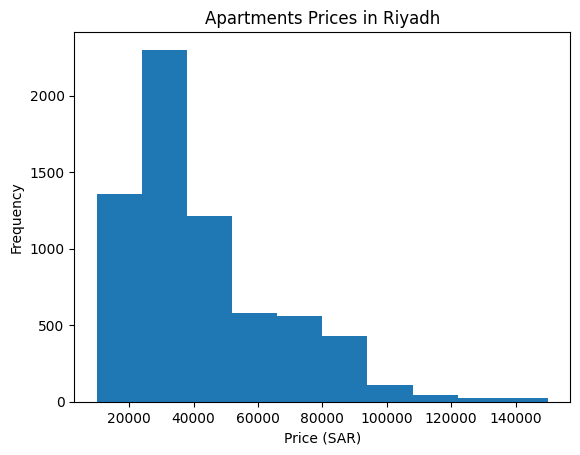

In [ ]:
plt.hist(non_outliers['price'])
plt.title('Apartments Prices in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Price (SAR)')

Text(0.5, 0, 'Price (SAR)')

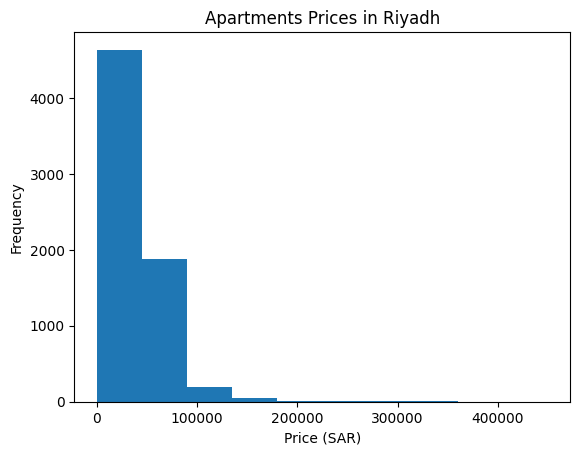

In [ ]:
plt.hist(Real_Estate['price'])
plt.title('Apartments Prices in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Price (SAR)')

In [154]:
non_outliers['area'].max()

185600.0

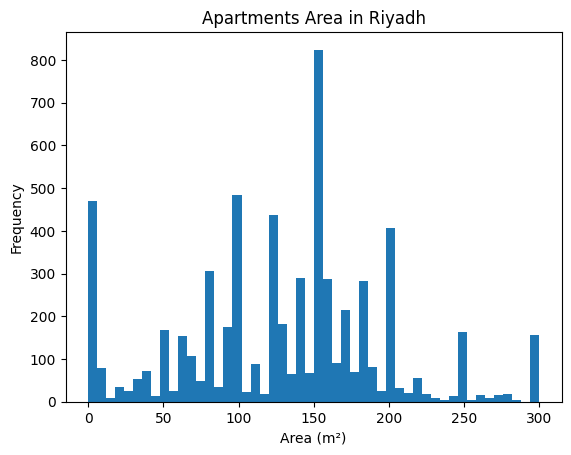

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'area' is the column with apartment areas
area_threshold = 300  # Adjust this threshold based on your data

# Filter out the extreme outliers (areas greater than the threshold)
non_outliers_area = non_outliers[non_outliers['area'] <= area_threshold]

# Plot the histogram for the filtered data
plt.hist(non_outliers_area['area'], bins=50)
plt.title('Apartments Area in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Area (m²)')
plt.show()


In [164]:
#Define the outlier condition 
street_width_outliers = non_outliers_area[(non_outliers_area['street_width'] > 70.0)& (non_outliers_area['street_width']<= 7.0)]

#Create a new DataFrame for non-outliers
non_outliers_street_width = non_outliers_area[(non_outliers_area['street_width'] >= 8.0)& (non_outliers_area['street_width']<= 70.0)]

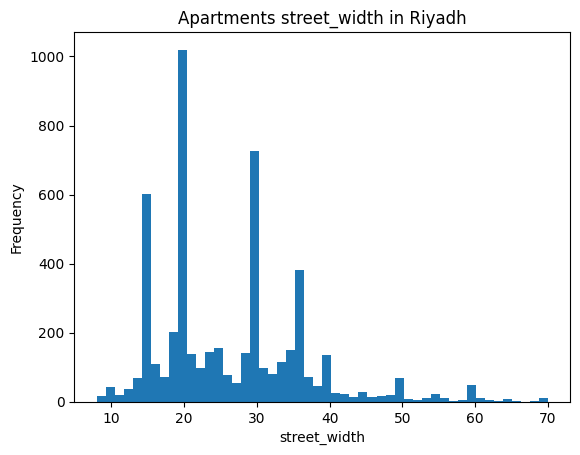

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# # Assuming 'df' is your DataFrame and 'area' is the column with apartment areas
# area_threshold = 300  # Adjust this threshold based on your data

# # Filter out the extreme outliers (areas greater than the threshold)
# non_outliers_area = non_outliers[non_outliers['street_width']]

# Plot the histogram for the filtered data
plt.hist(non_outliers_street_width['street_width'], bins=50)
plt.title('Apartments street_width in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('street_width')
plt.show()


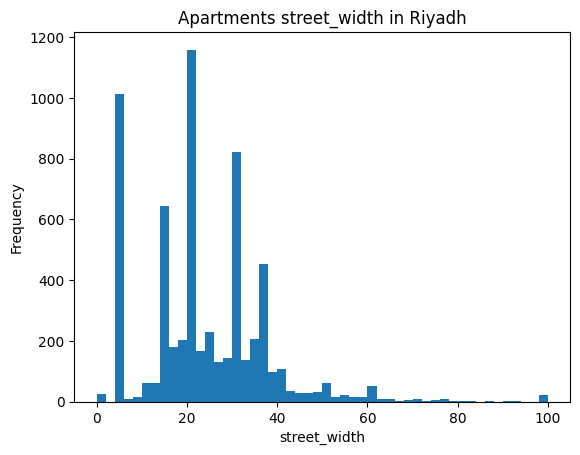

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# # Assuming 'df' is your DataFrame and 'area' is the column with apartment areas
# area_threshold = 300  # Adjust this threshold based on your data

# # Filter out the extreme outliers (areas greater than the threshold)
# non_outliers_area = non_outliers[non_outliers['street_width']]

# Plot the histogram for the filtered data
plt.hist(non_outliers_area['street_width'], bins=50)
plt.title('Apartments street_width in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('street_width')
plt.show()


In [174]:
outliers_street_width = non_outliers_street_width[non_outliers_street_width['age'] == 999]
non_outliers_street_width = non_outliers_street_width[non_outliers_street_width['age'] != 999]

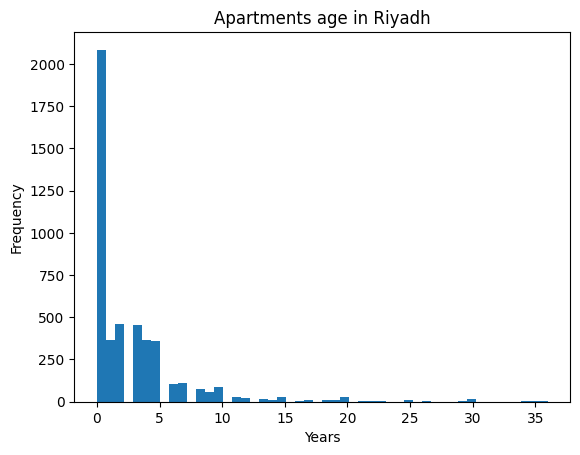

2025-02-19 22:30:38,067 - INFO     - Executing shutdown due to inactivity...


In [176]:
# there ia here a natural outliers
# Plot the histogram for the filtered data
plt.hist(non_outliers_street_width['age'], bins=50)
plt.title('Apartments age in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Years')
plt.show()

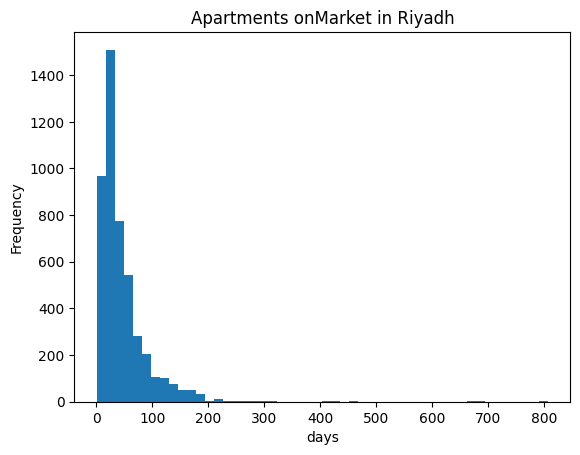

In [185]:
# there ia here a natural outliers
# Plot the histogram for the filtered data
plt.hist(non_outliers_street_width['onMarket'], bins=50)
plt.title('Apartments onMarket in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('days')
plt.show()

In [179]:
non_outliers_street_width.drop(non_outliers_street_width[non_outliers_street_width['livings'] == -1].index, inplace=True)

In [403]:
non_outliers_street_width.to_csv("cleaned_Real_Estate.csv",index=False)

## Riyadh_Aqqar_Land outliers

In [190]:
Riyadh_Aqqar_Land['السعر الإجمالي'].max()

893025000

In [227]:
#Define the outlier condition 
price_outliers = Riyadh_Aqqar_Land[(Riyadh_Aqqar_Land['السعر الإجمالي'] >=31080000)& (Riyadh_Aqqar_Land['السعر الإجمالي']<= 1000000)]

#Create a new DataFrame for non-outliers
non_outliers = Riyadh_Aqqar_Land[(Riyadh_Aqqar_Land['السعر الإجمالي'] >1000000)& (Riyadh_Aqqar_Land['السعر الإجمالي']< 31080000)]

Text(0.5, 0, 'area')

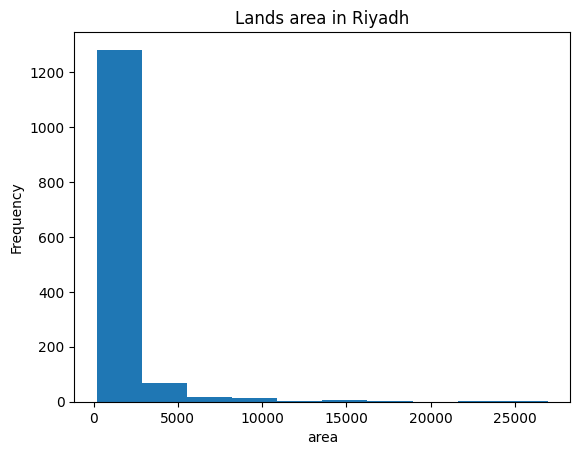

In [ ]:
# there is natural outlier here 
# Assuming 'df' is your DataFrame and 'area' is the column with apartment areas
area_threshold = 30000  # Adjust this threshold based on your data

# Filter out the extreme outliers (areas greater than the threshold)
non_outliers_area = non_outliers[non_outliers['المساحة'] < area_threshold]
plt.hist(non_outliers_area['المساحة'])
plt.title('Lands area in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('area')

Text(0.5, 0, 'Price (SAR)')

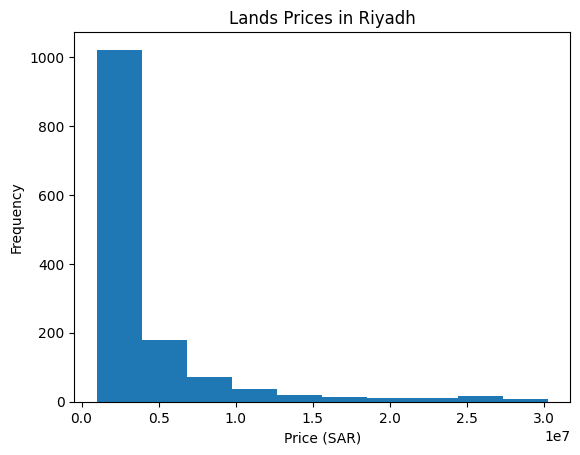

In [ ]:
# there is natural outlier here
plt.hist(non_outliers['السعر الإجمالي'])
plt.title('Lands Prices in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Price (SAR)')

In [404]:
non_outliers_area.to_csv("cleaned_Riyadh_Aqqar_Land.csv",index=False)

## Riyadh_Aqqar_Villas outliers

Text(0.5, 0, 'Price (SAR)')

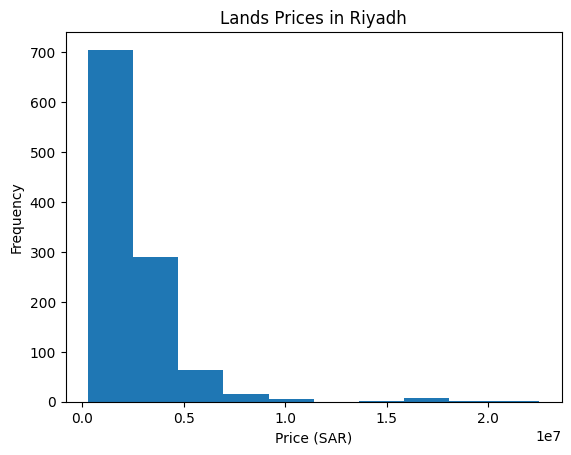

In [ ]:
# there is natural outlier here
plt.hist(Riyadh_Aqqar_Villas['السعر الاجمالي'])
plt.title('Villas Prices in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Price (SAR)')

Text(0.5, 0, 'width')

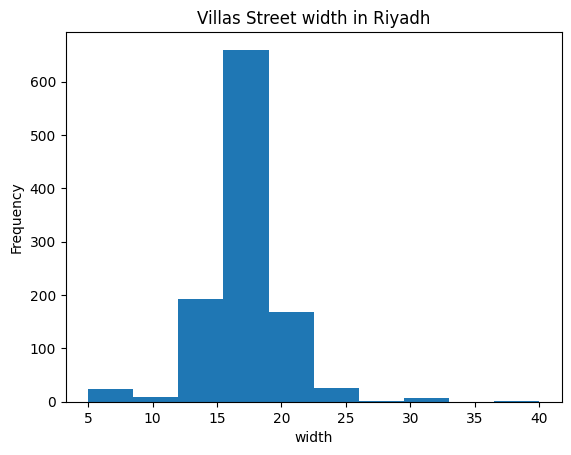

In [241]:
# there is natural outlier here
plt.hist(Riyadh_Aqqar_Villas['عرض الشارع'])
plt.title('Villas Street width in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('width')

In [247]:
Riyadh_Aqqar_Villas.shape

(1090, 20)

In [249]:
non_outliers.shape

(1087, 20)

Text(0.5, 0, 'area')

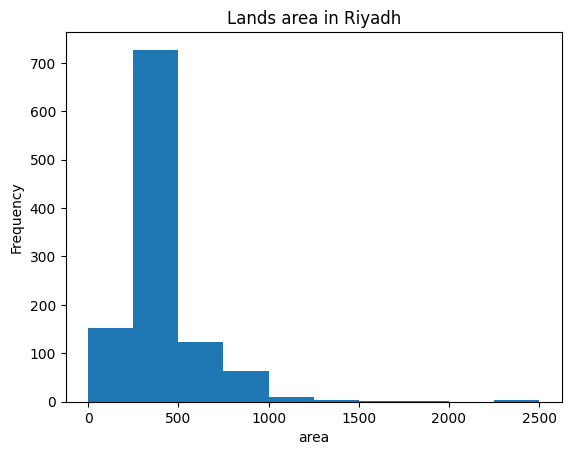

In [250]:
# there is natural outlier here 
# Assuming 'df' is your DataFrame and 'area' is the column with apartment areas
area_threshold = 4000  # Adjust this threshold based on your data

# Filter out the extreme outliers (areas greater than the threshold)
non_outliers= Riyadh_Aqqar_Villas[Riyadh_Aqqar_Villas['المساحة'] < area_threshold]
plt.hist(non_outliers['المساحة'])
plt.title('Lands area in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('area')

In [405]:
non_outliers.to_csv("cleaned_Riyadh_Aqqar_Villas.csv",index=False)

## Riyadh_Aqqar_Apartments outliers

Text(0.5, 0, 'Price (SAR)')

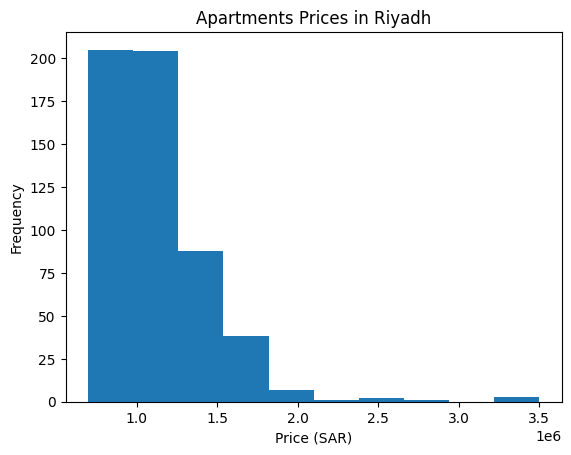

In [253]:
# there is natural outlier here
plt.hist(Riyadh_Aqqar_Apartments['السعر الاجمالي'])
plt.title('Apartments Prices in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Price (SAR)')

Text(0.5, 0, 'Area m^2')

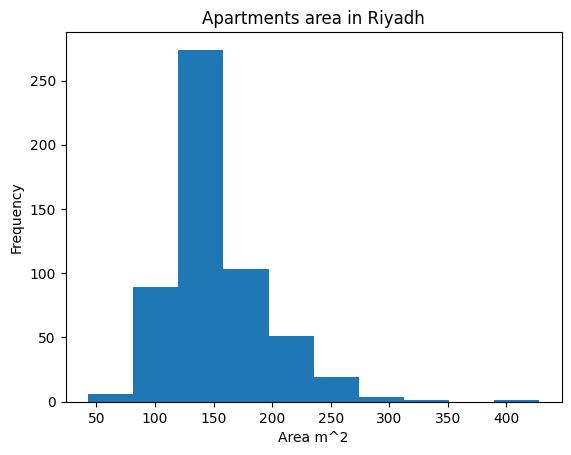

In [262]:
# there is natural outlier here
plt.hist(Riyadh_Aqqar_Apartments["المساحة"])
plt.title('Apartments area in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Area m^2')

In [259]:
Riyadh_Aqqar_Apartments.drop(Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments['عمر العقار'] == 999].index, inplace=True)

Text(0.5, 0, 'Years')

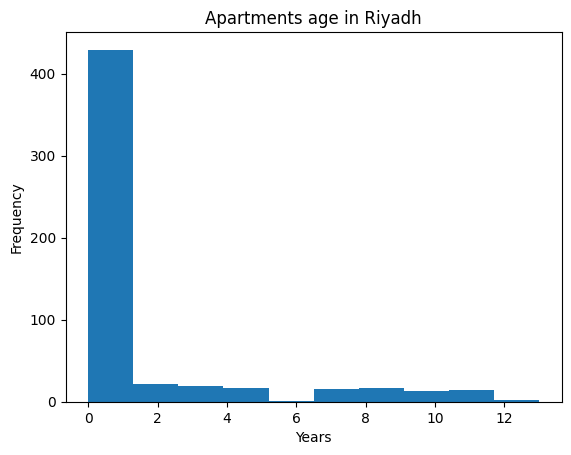

In [261]:
# there is natural outlier here
plt.hist(Riyadh_Aqqar_Apartments["عمر العقار"])
plt.title('Apartments age in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Years')

In [268]:
Riyadh_Aqqar_Apartments.drop(Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments['عدد الصالات'] == 999].index, inplace=True)

In [406]:
non_outliers.to_csv("cleaned_Riyadh_Aqqar_Apartments.csv",index=False)

## Riyadh_VillasAqar outliers

In [336]:
#Define the outlier condition 
price_outliers = Riyadh_VillasAqar[(Riyadh_VillasAqar['price']<=500000)]

#Create a new DataFrame for non-outliers
non_outliers = Riyadh_VillasAqar[(Riyadh_VillasAqar['price'] >500000.0)& (Riyadh_VillasAqar['price']<= 12000000.0)]

Text(0.5, 0, 'Price')

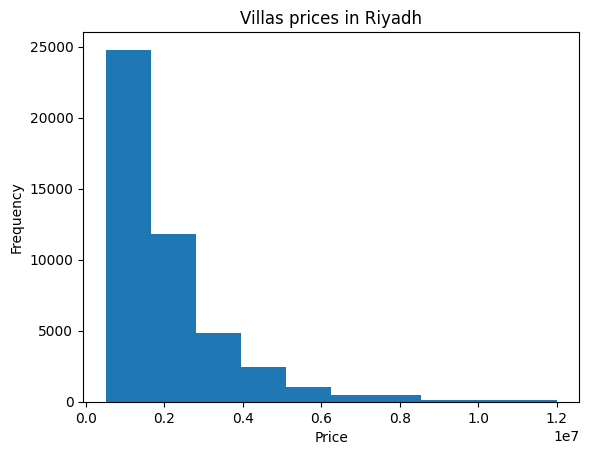

In [338]:
# there is natural outlier here
plt.hist(non_outliers["price"])
plt.title('Villas prices in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Price')

Text(0.5, 0, 'square Price')

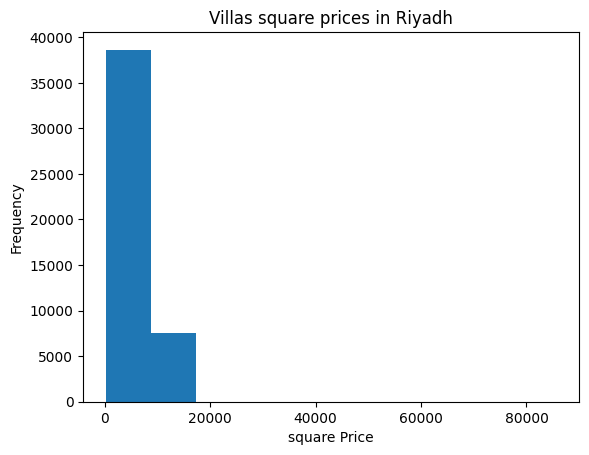

In [348]:
# there is natural outlier here
plt.hist(non_outliers["square price"])
plt.title('Villas square prices in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('square Price')

In [344]:
#Define the outlier condition 
space_outliers = non_outliers[(non_outliers['space'] < 200) & (non_outliers['space']>1750)]

#Create a new DataFrame for non-outliers
non_outliers_space = non_outliers[(non_outliers['space'] <=1750)& (non_outliers['space']>=200)]

Text(0.5, 0, 'space')

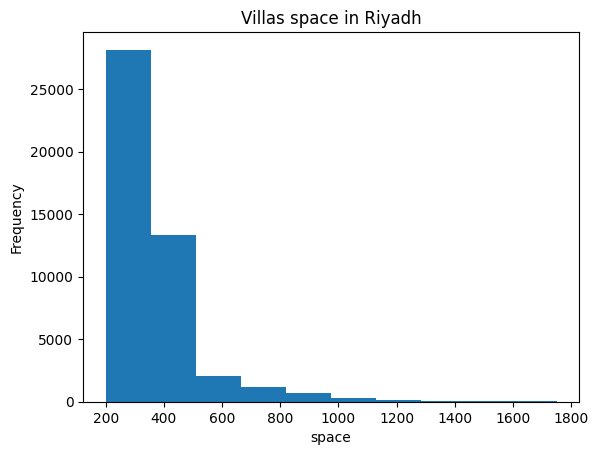

In [345]:
# there is natural outlier here
plt.hist(non_outliers_space["space"])
plt.title('Villas space in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('space')

Text(0.5, 0, 'Years')

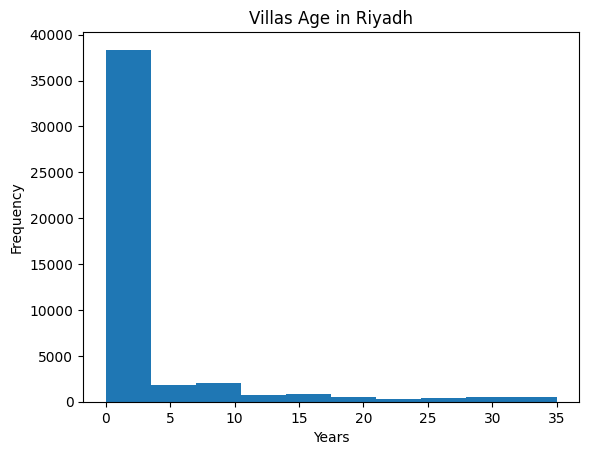

In [347]:
# there is natural outlier here
plt.hist(non_outliers_space["propertyAge"])
plt.title('Villas Age in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Years')

In [351]:
#Define the outlier condition 
streetWidth_outliers = non_outliers_space[(non_outliers_space['streetWidth'] < 8) & (non_outliers_space['streetWidth']>45)]

#Create a new DataFrame for non-outliers
non_outliers_streetWidth= non_outliers_space[(non_outliers_space['streetWidth'] <=45)& (non_outliers_space['streetWidth']>=8)]

Text(0.5, 0, 'Width')

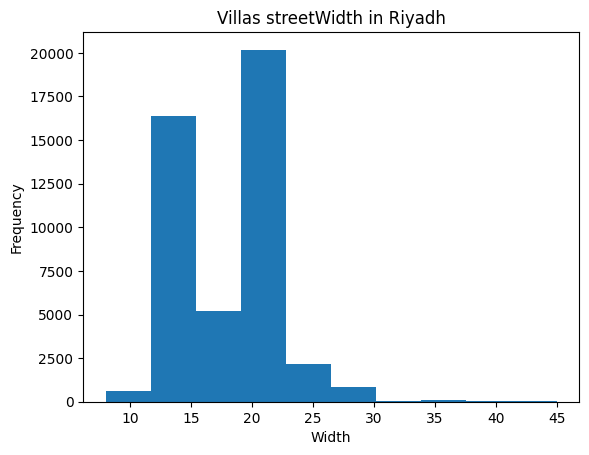

In [ ]:
plt.hist(non_outliers_streetWidth["streetWidth"])
plt.title('Villas streetWidth in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Width')

Text(0.5, 0, 'Rooms')

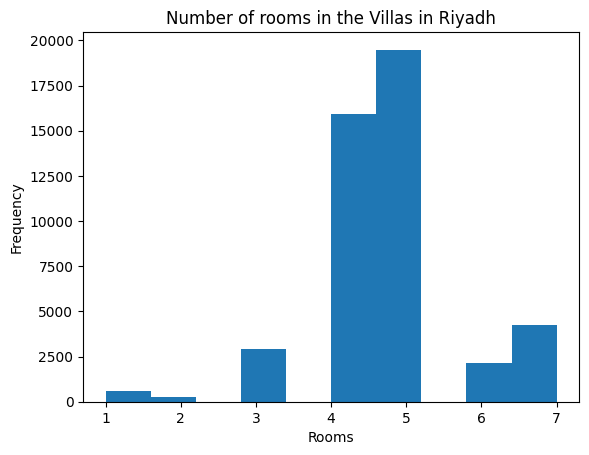

In [354]:
# there is natural outlier here
plt.hist(non_outliers_streetWidth["rooms"])
plt.title('Number of rooms in the Villas in Riyadh')
plt.ylabel('Frequency')
plt.xlabel('Rooms')

In [407]:
non_outliers_streetWidth.to_csv("cleaned_Riyadh_VillasAqar.csv",index=False)

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

## Which district has the cheapest and most expensive lands?

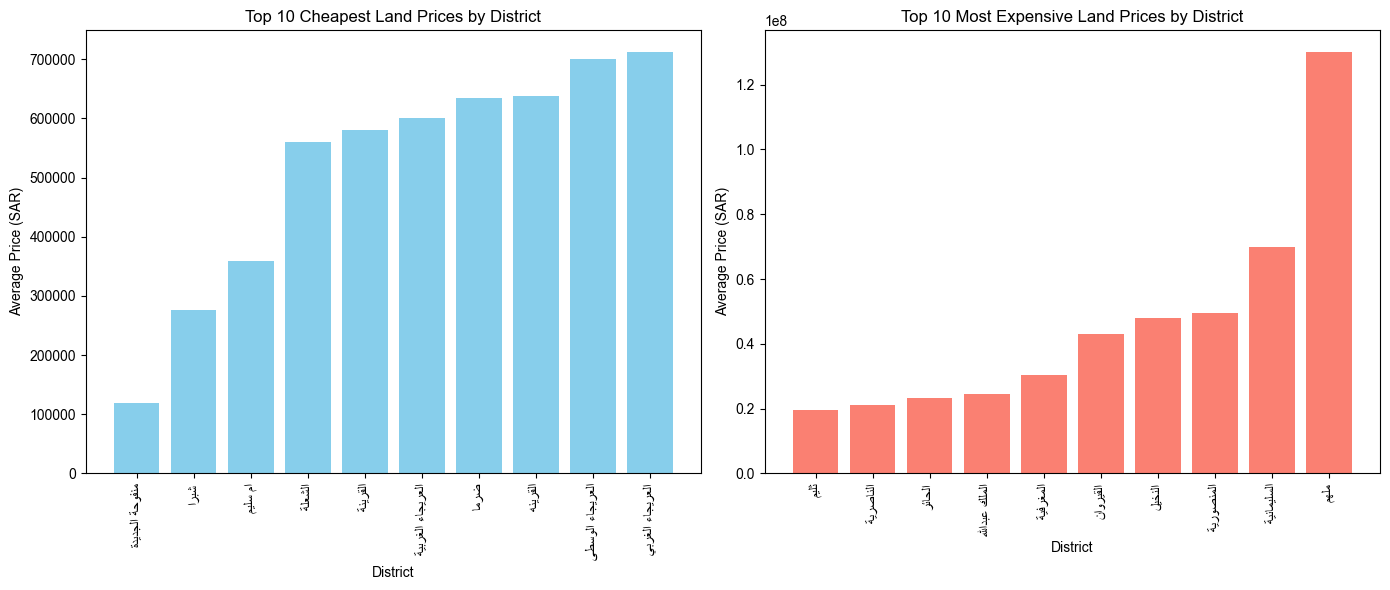

In [372]:
# Assuming 'Riyadh_Aqqar_Land' is your DataFrame
# Find the average land price per district and sort it
district_land_prices = Riyadh_Aqqar_Land.groupby('الحي')['السعر الإجمالي'].mean().sort_values()

# Set the font to one that supports Arabic
plt.rcParams['font.family'] = 'Arial'  # Or another Arabic-compatible font

# Reshape Arabic text and apply right-to-left layout
reshaped_titles = [reshape(i) for i in district_land_prices.index]
bidi_titles = [get_display(i) for i in reshaped_titles]

# Create subplots (2 plots in one row)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 10 cheapest districts
axes[0].bar(bidi_titles[:10], district_land_prices.head(10), color='skyblue')
axes[0].set_title('Top 10 Cheapest Land Prices by District')
axes[0].set_xlabel('District')
axes[0].set_ylabel('Average Price (SAR)')
axes[0].tick_params(axis='x', rotation=90)

# Plot the top 10 most expensive districts
axes[1].bar(bidi_titles[-10:], district_land_prices.tail(10), color='salmon')
axes[1].set_title('Top 10 Most Expensive Land Prices by District')
axes[1].set_xlabel('District')
axes[1].set_ylabel('Average Price (SAR)')
axes[1].tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()


## Which district has the cheapest and most expensive lands? Real_Estate

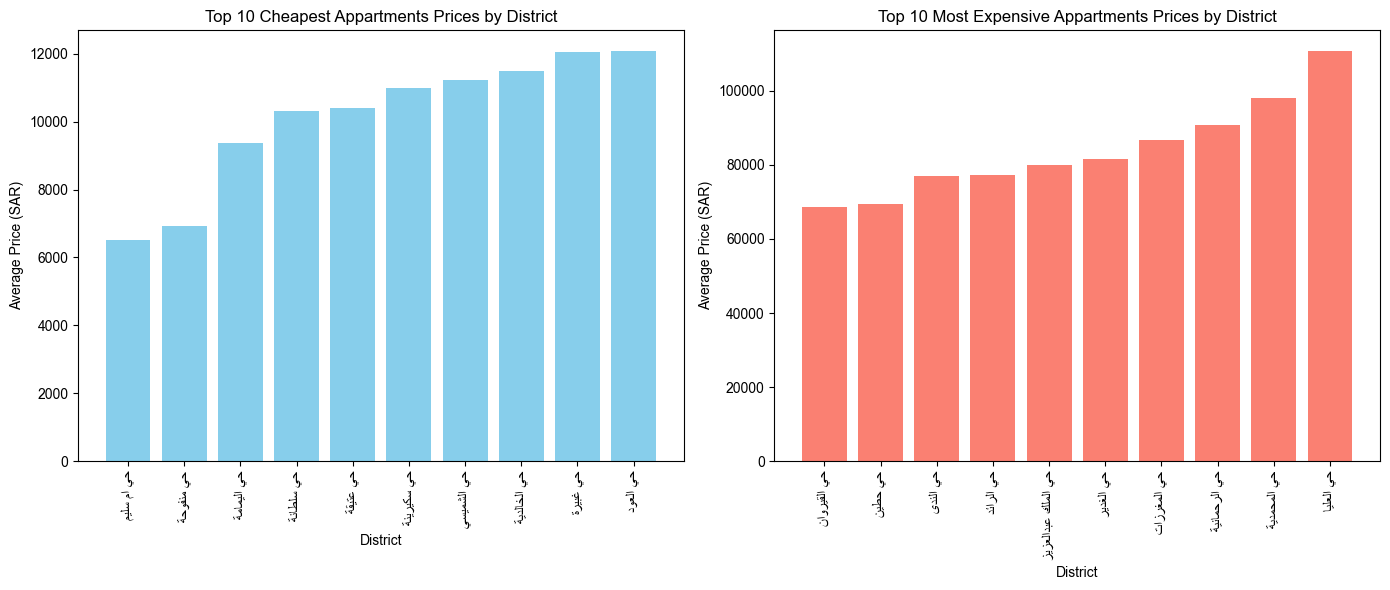

In [394]:
# Assuming 'Riyadh_Aqqar_Land' is your DataFrame
# Find the average land price per district and sort it
district_Villas_prices = Real_Estate.groupby('district')['price'].mean().sort_values()

# Set the font to one that supports Arabic
plt.rcParams['font.family'] = 'Arial'  # Or another Arabic-compatible font

# Reshape Arabic text and apply right-to-left layout
reshaped_titles = [reshape(i) for i in district_Villas_prices.index]
bidi_titles = [get_display(i) for i in reshaped_titles]

# Create subplots (2 plots in one row)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 10 cheapest districts
axes[0].bar(bidi_titles[:10], district_Villas_prices.head(10), color='skyblue')
axes[0].set_title('Top 10 Cheapest Appartments Prices by District')
axes[0].set_xlabel('District')
axes[0].set_ylabel('Average Price (SAR)')
axes[0].tick_params(axis='x', rotation=90)

# Plot the top 10 most expensive districts
axes[1].bar(bidi_titles[-10:], district_Villas_prices.tail(10), color='salmon')
axes[1].set_title('Top 10 Most Expensive Appartments Prices by District')
axes[1].set_xlabel('District')
axes[1].set_ylabel('Average Price (SAR)')
axes[1].tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()

## Which district has the cheapest and most expensive villas?

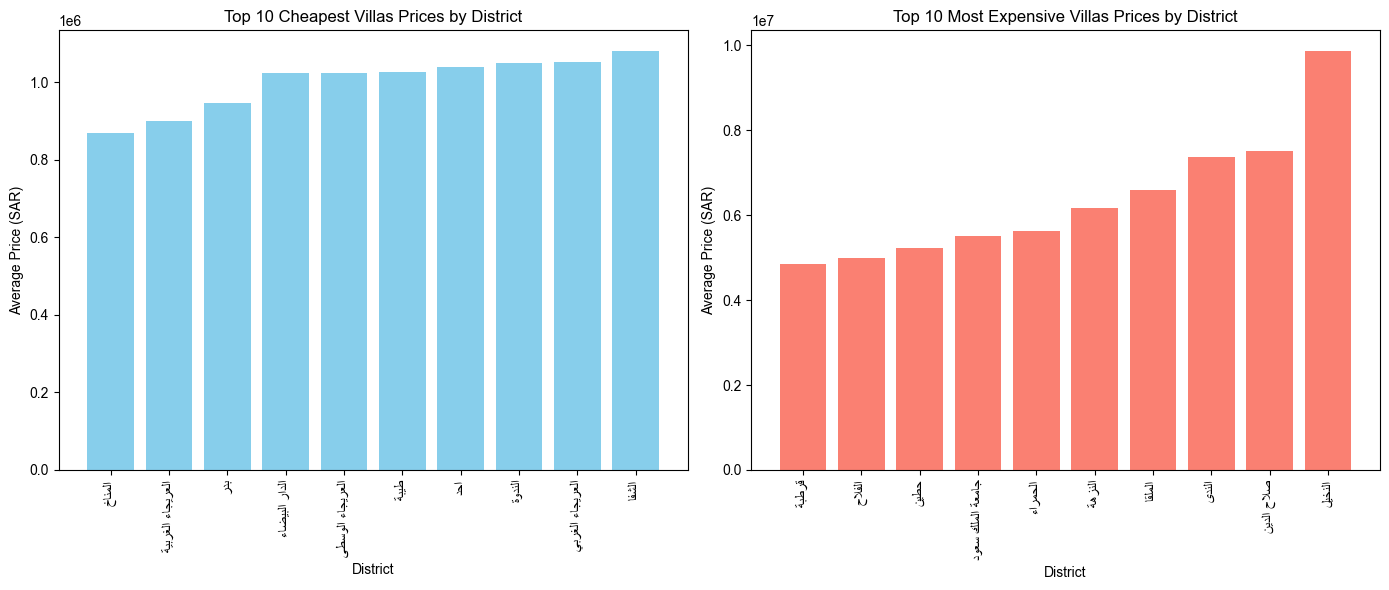

In [381]:
# Assuming 'Riyadh_Aqqar_Land' is your DataFrame
# Find the average land price per district and sort it
district_Villas_prices = Riyadh_Aqqar_Villas.groupby('الحي')['السعر الاجمالي'].mean().sort_values()

# Set the font to one that supports Arabic
plt.rcParams['font.family'] = 'Arial'  # Or another Arabic-compatible font

# Reshape Arabic text and apply right-to-left layout
reshaped_titles = [reshape(i) for i in district_Villas_prices.index]
bidi_titles = [get_display(i) for i in reshaped_titles]

# Create subplots (2 plots in one row)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 10 cheapest districts
axes[0].bar(bidi_titles[:10], district_Villas_prices.head(10), color='skyblue')
axes[0].set_title('Top 10 Cheapest Villas Prices by District')
axes[0].set_xlabel('District')
axes[0].set_ylabel('Average Price (SAR)')
axes[0].tick_params(axis='x', rotation=90)

# Plot the top 10 most expensive districts
axes[1].bar(bidi_titles[-10:], district_Villas_prices.tail(10), color='salmon')
axes[1].set_title('Top 10 Most Expensive Villas Prices by District')
axes[1].set_xlabel('District')
axes[1].set_ylabel('Average Price (SAR)')
axes[1].tick_params(axis='x', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()


## Which factors influence the price the most (for Lands,Villas and appartments )?

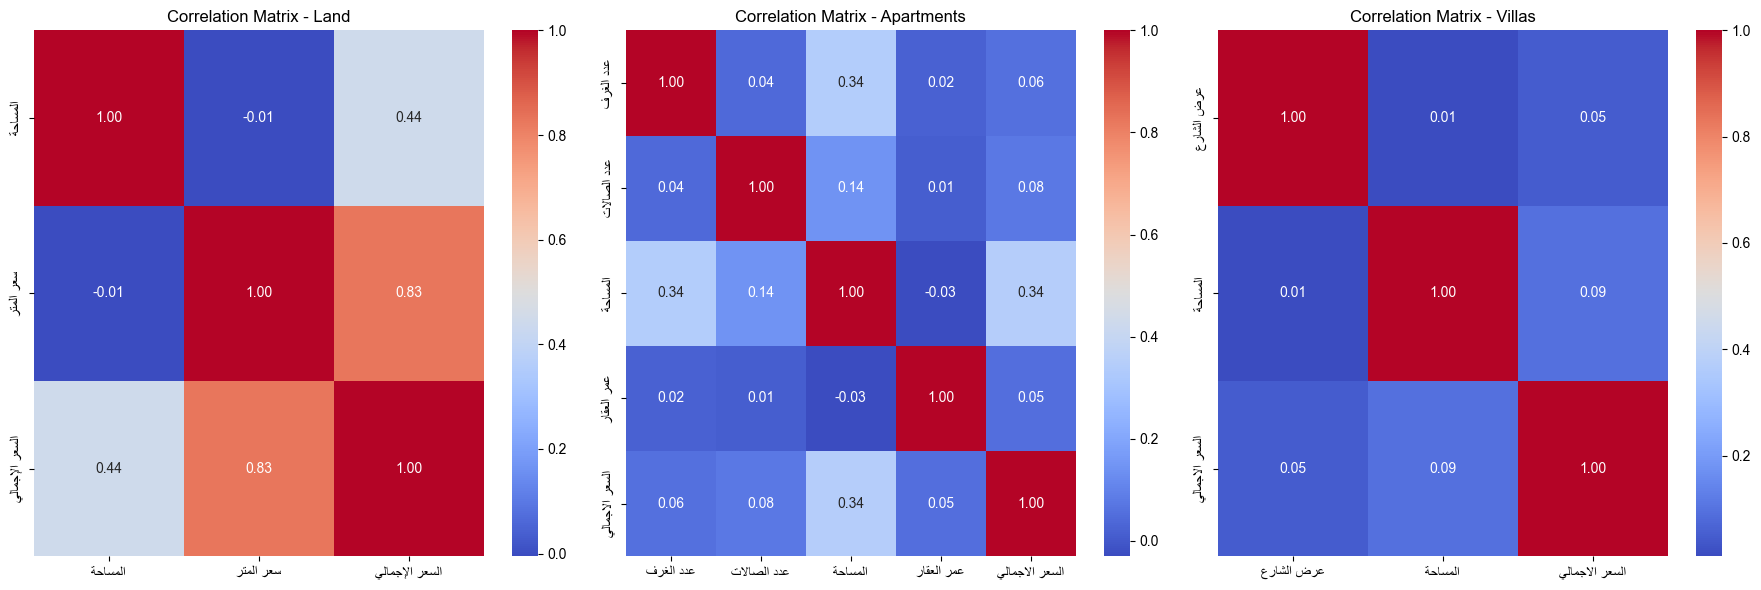

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Create subplots (3 plots in one row)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define datasets
datasets = [Riyadh_Aqqar_Land, Riyadh_Aqqar_Apartments, Riyadh_Aqqar_Villas]
titles = ['Correlation Matrix - Land', 'Correlation Matrix - Apartments', 'Correlation Matrix - Villas']

# Loop through datasets and plot heatmaps
for i, df in enumerate(datasets):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['number'])
    
    # Compute correlation matrix
    correlation_matrix = numeric_columns.corr()
    
    # Reshape Arabic column names to display correctly
    reshaped_labels = [get_display(arabic_reshaper.reshape(col)) for col in correlation_matrix.columns]
    
    # Plot the heatmap for each dataset in the corresponding subplot
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
                xticklabels=reshaped_labels, yticklabels=reshaped_labels, ax=axes[i])
    axes[i].set_title(titles[i])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Are people encouraged to rent apartments from verified agents?

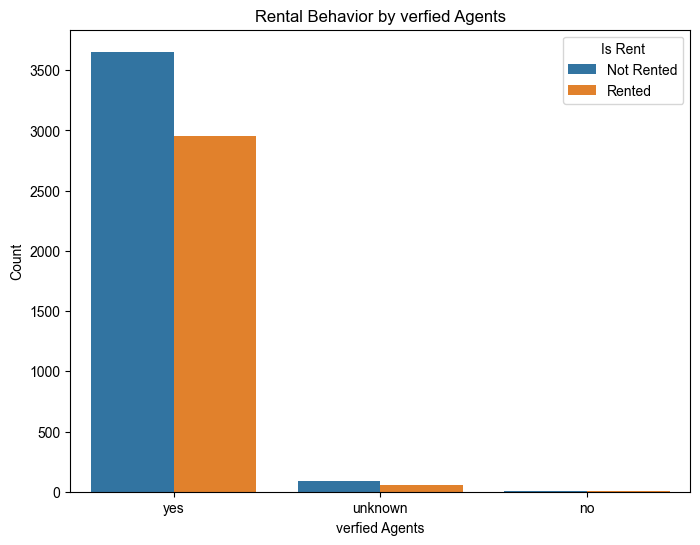

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Assuming 'iam_verified' exists in Real_Estate
crosstab = pd.crosstab(Real_Estate['iam_verified'], Real_Estate['IsRent'], 
                       rownames=['Verified'], colnames=['Rented'])


# Plot the distribution using a bar plot (ensure you're using the correct column name)
plt.figure(figsize=(8, 6))
sns.countplot(data=Real_Estate, x='iam_verified', hue='IsRent')  # Update with the correct DataFrame
plt.title('Rental Behavior by verfied Agents')
plt.xlabel('verfied Agents')
plt.ylabel('Count')
plt.legend(title='Is Rent', loc='upper right', labels=['Not Rented', 'Rented'])
plt.show()

